# Data Pre-Processing

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Nutrition/ABBREVcsv.csv')
df

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(mcg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,83110,"MACKEREL,SALTED",43.00,305,18.50,25.10,13.40,0.00,0.0,0.00,...,7.8,7.148,8.320,6.210,95.0,80.00,"1 piece, (5-1/2"" x 1-1/2"" x 1/2"")",17.0,"1 cubic inch, boneless",0.0
8786,90240,"SCALLOP,(BAY&SEA),CKD,STMD",70.25,111,20.54,0.84,2.97,5.41,0.0,0.00,...,0.0,0.218,0.082,0.222,41.0,85.00,3 oz,NaN,NaN,0.0
8787,90480,"SYRUP,CANE",26.00,269,0.00,0.00,0.86,73.14,0.0,73.20,...,0.0,0.000,0.000,0.000,0.0,21.00,1 serving,NaN,NaN,0.0
8788,90560,"SNAIL,RAW",79.20,90,16.10,1.40,1.30,2.00,0.0,0.00,...,0.1,0.361,0.259,0.252,50.0,85.00,3 oz,NaN,NaN,0.0


In [ ]:
# remove unnecessary columns
df = df[["NDB_No","Shrt_Desc", 'Protein_(g)', 'Calcium_(mg)', 'Iron_(mg)', 
              'Magnesium_(mg)', 'Phosphorus_(mg)', 'Potassium_(mg)',
              'Zinc_(mg)', 'Copper_mg)', 'Manganese_(mg)', 'Selenium_(mcg)',
              'Vit_C_(mg)', 'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)',
              'Panto_Acid_mg)', 'Vit_B6_(mg)', 'Folate_Tot_(mcg)',
              'Choline_Tot_ (mg)', 'Vit_B12_(mcg)', 'Vit_A_RAE','Vit_E_(mg)',
              'Vit_D_mcg','Vit_K_(mcg)', 'GmWt_1']]
# missing biotin and iodine 
# there are RDIs for those, but they're not in data

In [ ]:
# remove baby food (NDB_No 3000-3999) and spices (NDB_No 2000-2999)
df = df[(df["NDB_No"] >= 4000) | (df["NDB_No"] < 2000)]
# 383 rows removed

In [ ]:
df=df.fillna(0)
df

,NDB_No,Shrt_Desc,Protein_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Zinc_(mg),Copper_mg),...,Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(mcg),Choline_Tot_ (mg),Vit_B12_(mcg),Vit_A_RAE,Vit_E_(mg),Vit_D_mcg,Vit_K_(mcg),GmWt_1
0,1001,"BUTTER,WITH SALT",0.85,24.0,0.02,2.0,24.0,24.0,0.09,0.000,...,0.110,0.003,3.0,18.8,0.17,684.0,2.32,0.0,7.0,5.00
1,1002,"BUTTER,WHIPPED,W/ SALT",0.49,23.0,0.05,1.0,24.0,41.0,0.05,0.010,...,0.097,0.008,4.0,18.8,0.07,683.0,1.37,0.0,4.6,3.80
2,1003,"BUTTER OIL,ANHYDROUS",0.28,4.0,0.00,0.0,3.0,5.0,0.01,0.001,...,0.010,0.001,0.0,22.3,0.01,840.0,2.80,0.0,8.6,12.80
3,1004,"CHEESE,BLUE",21.40,528.0,0.31,23.0,387.0,256.0,2.66,0.040,...,1.729,0.166,36.0,15.4,1.22,198.0,0.25,0.5,2.4,28.35
4,1005,"CHEESE,BRICK",23.24,674.0,0.43,24.0,451.0,136.0,2.60,0.024,...,0.288,0.065,20.0,15.4,1.26,292.0,0.26,0.5,2.5,132.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,83110,"MACKEREL,SALTED",18.50,66.0,1.40,60.0,254.0,520.0,1.10,0.100,...,0.000,0.410,15.0,101.6,12.00,47.0,2.38,25.2,7.8,80.00
8786,90240,"SCALLOP,(BAY&SEA),CKD,STMD",20.54,10.0,0.58,37.0,426.0,314.0,1.55,0.033,...,0.366,0.112,20.0,110.7,2.15,2.0,0.00,0.0,0.0,85.00
8787,90480,"SYRUP,CANE",0.00,13.0,3.60,10.0,8.0,63.0,0.19,0.020,...,0.000,0.000,0.0,0.0,0.00,0.0,0.00,0.0,0.0,21.00
8788,90560,"SNAIL,RAW",16.10,10.0,3.50,250.0,272.0,382.0,1.00,0.400,...,0.000,0.130,6.0,65.0,0.50,30.0,5.00,0.0,0.1,85.00


In [ ]:
df.head(50)

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),...,Vit_K_(mcg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.20,1 tbsp,0.0
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.40,1 tbsp,0.0
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.00,1 cup,0.0
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.00,1 cubic inch,0.0
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.00,"1 cup, shredded",0.0
5,1006,"CHEESE,BRIE",48.42,334,20.75,27.68,2.70,0.45,0.0,0.45,...,2.3,17.410,8.013,0.826,100.0,28.35,1 oz,144.00,"1 cup, sliced",0.0
6,1007,"CHEESE,CAMEMBERT",51.80,300,19.80,24.26,3.68,0.46,0.0,0.46,...,2.0,15.259,7.023,0.724,72.0,28.35,1 oz,246.00,1 cup,0.0
7,1008,"CHEESE,CARAWAY",39.28,376,25.18,29.20,3.28,3.06,0.0,0.00,...,0.0,18.584,8.275,0.830,93.0,28.35,1 oz,0.00,0,0.0
8,1009,"CHEESE,CHEDDAR",37.02,404,22.87,33.31,3.71,3.09,0.0,0.48,...,2.4,18.867,9.246,1.421,99.0,132.00,"1 cup, diced",244.00,"1 cup, melted",0.0
9,1010,"CHEESE,CHESHIRE",37.65,387,23.37,30.60,3.60,4.78,0.0,0.00,...,0.0,19.475,8.671,0.870,103.0,28.35,1 oz,0.00,0,0.0


# Popularity Index

In [ ]:
# load NHANES dietary recall data
popular = pd.read_sas('/content/drive/MyDrive/Nutrition/DR1IFF_J.XPT')

# delete unnecessary columns (we just need the food codes)
popular = popular.DR1IFDCD


#popular.head(10)

In [ ]:
# load food codes with ingredient codes data
ingred = pd.read_csv('/content/drive/MyDrive/Nutrition/FNDDSIngredients.csv')
ingred = ingred[["Foodcode","Ingredientcode"]]




In [ ]:
# merge food/ingred code key with diet recall data
popular = popular.to_frame().merge(ingred,
                                   left_on="DR1IFDCD",
                                   right_on="Foodcode",
                                   how="left")
popular.head(10)

,DR1IFDCD,Foodcode,Ingredientcode
0,55100050.0,55100050.0,1123.0
1,55100050.0,55100050.0,2047.0
2,55100050.0,55100050.0,18291.0
3,55100050.0,55100050.0,19335.0
4,55100050.0,55100050.0,11100000.0
5,55100050.0,55100050.0,81200100.0
6,55100050.0,55100050.0,82101000.0
7,11513600.0,11513600.0,1082.0
8,11513600.0,11513600.0,19924.0
9,24198739.0,24198739.0,24198741.0


In [ ]:
# generate a list of each food code with how often it appears
repeats = popular.Ingredientcode.value_counts()
repeats = repeats.to_frame()
repeats = repeats.rename(columns={"Ingredientcode":"popularity"})
repeats["NDB_No"] = repeats.index
repeats.sort_values("NDB_No").head(10)



,popularity,NDB_No
1001.0,1147,1001.0
1002.0,219,1002.0
1003.0,87,1003.0
1004.0,26,1004.0
1005.0,6,1005.0
1006.0,5,1006.0
1009.0,1156,1009.0
1011.0,90,1011.0
1012.0,46,1012.0
1014.0,1,1014.0


In [ ]:
repeats[repeats.NDB_No.duplicated()]

,popularity,NDB_No


In [ ]:
# add column of repeats to df
df = df.merge(repeats,on="NDB_No",how="left")


In [ ]:
df.popularity.describe()

count     1489.000000
mean        96.333109
std        406.622137
min          1.000000
25%          5.000000
50%         17.000000
75%         64.000000
max      10331.000000
Name: popularity, dtype: float64

In [ ]:
df.popularity = df.popularity.fillna(0)
df.popularity.describe()

count     8407.000000
mean        17.061972
std        174.988153
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      10331.000000
Name: popularity, dtype: float64

In [ ]:
df.sort_values("popularity",ascending=False).head(10)

,NDB_No,Shrt_Desc,Protein_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Zinc_(mg),Copper_mg),...,Vit_B6_(mg),Folate_Tot_(mcg),Choline_Tot_ (mg),Vit_B12_(mcg),Vit_A_RAE,Vit_E_(mg),Vit_D_mcg,Vit_K_(mcg),GmWt_1,popularity
4000,14411,"BEVERAGES,H2O,TAP,DRINKING",0.00,3.0,0.00,1.0,0.0,0.0,0.01,0.010,...,0.000,0.0,0.0,0.00,0.0,0.00,0.0,0.0,29.6,10331.0
4048,14555,"WATER,BTLD,GENERIC",0.00,10.0,0.00,2.0,0.0,0.0,0.00,0.007,...,0.000,0.0,0.0,0.00,0.0,0.00,0.0,0.0,29.6,7331.0
5935,19335,"SUGARS,GRANULATED",0.00,1.0,0.05,0.0,0.0,2.0,0.01,0.007,...,0.000,0.0,0.0,0.00,0.0,0.00,0.0,0.0,2.8,5494.0
111,1123,"EGG,WHL,RAW,FRSH",12.56,56.0,1.75,12.0,198.0,138.0,1.29,0.072,...,0.170,47.0,293.8,0.89,160.0,1.05,2.0,0.3,50.0,2687.0
3893,14209,"BEVERAGES,COFFEE,BREWED,PREP W/ TAP H2O",0.12,2.0,0.01,3.0,3.0,49.0,0.02,0.002,...,0.001,2.0,2.6,0.00,0.0,0.01,0.0,0.1,29.6,2365.0
69,1077,"MILK,WHL,3.25% MILKFAT,W/ ADDED VITAMIN D",3.15,113.0,0.03,10.0,84.0,132.0,0.37,0.025,...,0.036,5.0,14.3,0.45,46.0,0.07,1.3,0.3,244.0,1888.0
71,1079,"MILK,RED FAT,FLUID,2% MILKFAT,W/ ADDED VIT A &...",3.30,120.0,0.02,11.0,92.0,140.0,0.48,0.006,...,0.038,5.0,16.4,0.53,55.0,0.03,1.2,0.2,244.0,1819.0
3844,14148,"BEVERAGES,CARB,COLA,REG",0.00,1.0,0.02,0.0,9.0,5.0,0.09,0.007,...,0.000,0.0,0.3,0.00,0.0,0.00,0.0,0.0,30.7,1502.0
1775,9040,"BANANAS,RAW",1.09,5.0,0.26,27.0,22.0,358.0,0.15,0.078,...,0.367,20.0,9.8,0.00,3.0,0.10,0.0,0.5,225.0,1417.0
263,4025,"SALAD DRSNG,MAYO,REG",0.96,8.0,0.21,1.0,21.0,20.0,0.15,0.019,...,0.008,5.0,34.2,0.12,16.0,3.28,0.2,163.0,13.8,1351.0


In [ ]:
del ingred
del popular
del repeats

# EDA

In [ ]:
df.tail(5)

,NDB_No,Shrt_Desc,Protein_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Zinc_(mg),Copper_mg),...,Vit_B6_(mg),Folate_Tot_(mcg),Choline_Tot_ (mg),Vit_B12_(mcg),Vit_A_RAE,Vit_E_(mg),Vit_D_mcg,Vit_K_(mcg),GmWt_1,popularity
8402,83110,"MACKEREL,SALTED",18.50,66.0,1.40,60.0,254.0,520.0,1.10,0.100,...,0.410,15.0,101.6,12.00,47.0,2.38,25.2,7.8,80.0,0.0
8403,90240,"SCALLOP,(BAY&SEA),CKD,STMD",20.54,10.0,0.58,37.0,426.0,314.0,1.55,0.033,...,0.112,20.0,110.7,2.15,2.0,0.00,0.0,0.0,85.0,0.0
8404,90480,"SYRUP,CANE",0.00,13.0,3.60,10.0,8.0,63.0,0.19,0.020,...,0.000,0.0,0.0,0.00,0.0,0.00,0.0,0.0,21.0,0.0
8405,90560,"SNAIL,RAW",16.10,10.0,3.50,250.0,272.0,382.0,1.00,0.400,...,0.130,6.0,65.0,0.50,30.0,5.00,0.0,0.1,85.0,0.0
8406,93600,"TURTLE,GREEN,RAW",19.80,118.0,1.40,20.0,180.0,230.0,1.00,0.250,...,0.120,15.0,65.0,1.00,30.0,0.50,0.0,0.1,85.0,0.0


In [ ]:
df.columns[2:26]

Index(['Protein_(g)', 'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Zinc_(mg)', 'Copper_mg)',
       'Manganese_(mg)', 'Selenium_(mcg)', 'Vit_C_(mg)', 'Thiamin_(mg)',
       'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)', 'Vit_B6_(mg)',
       'Folate_Tot_(mcg)', 'Choline_Tot_ (mg)', 'Vit_B12_(mcg)', 'Vit_A_RAE',
       'Vit_E_(mg)', 'Vit_D_mcg', 'Vit_K_(mcg)', 'GmWt_1'],
      dtype='object')

In [ ]:
# create data frame of nutrients per common-use measurement 
# (as opposed to nutrients per 100g food)
amount_per_common_measure_df = pd.DataFrame()
for column in df.columns[2:25]:  
    amount_per_common_measure_df[column] = df[column] * df['GmWt_1'] / 100

del column

In [ ]:
amount_per_common_measure_df = df[["NDB_No","Shrt_Desc","popularity"]].merge(
    amount_per_common_measure_df,
    left_index=True,
    right_index=True,
    how="left"
)

amount_per_common_measure_df

,NDB_No,Shrt_Desc,popularity,Protein_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Zinc_(mg),...,Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(mcg),Choline_Tot_ (mg),Vit_B12_(mcg),Vit_A_RAE,Vit_E_(mg),Vit_D_mcg,Vit_K_(mcg)
0,1001,"BUTTER,WITH SALT",1147.0,0.04250,1.200,0.001000,0.1000,1.2000,1.200,0.00450,...,0.002100,0.005500,0.000150,0.150,0.9400,0.00850,34.200,0.116000,0.00000,0.3500
1,1002,"BUTTER,WHIPPED,W/ SALT",219.0,0.01862,0.874,0.001900,0.0380,0.9120,1.558,0.00190,...,0.000836,0.003686,0.000304,0.152,0.7144,0.00266,25.954,0.052060,0.00000,0.1748
2,1003,"BUTTER OIL,ANHYDROUS",87.0,0.03584,0.512,0.000000,0.0000,0.3840,0.640,0.00128,...,0.000384,0.001280,0.000128,0.000,2.8544,0.00128,107.520,0.358400,0.00000,1.1008
3,1004,"CHEESE,BLUE",26.0,6.06690,149.688,0.087885,6.5205,109.7145,72.576,0.75411,...,0.288036,0.490172,0.047061,10.206,4.3659,0.34587,56.133,0.070875,0.14175,0.6804
4,1005,"CHEESE,BRICK",6.0,30.67680,889.680,0.567600,31.6800,595.3200,179.520,3.43200,...,0.155760,0.380160,0.085800,26.400,20.3280,1.66320,385.440,0.343200,0.66000,3.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,83110,"MACKEREL,SALTED",0.0,14.80000,52.800,1.120000,48.0000,203.2000,416.000,0.88000,...,2.640000,0.000000,0.328000,12.000,81.2800,9.60000,37.600,1.904000,20.16000,6.2400
8403,90240,"SCALLOP,(BAY&SEA),CKD,STMD",0.0,17.45900,8.500,0.493000,31.4500,362.1000,266.900,1.31750,...,0.914600,0.311100,0.095200,17.000,94.0950,1.82750,1.700,0.000000,0.00000,0.0000
8404,90480,"SYRUP,CANE",0.0,0.00000,2.730,0.756000,2.1000,1.6800,13.230,0.03990,...,0.021000,0.000000,0.000000,0.000,0.0000,0.00000,0.000,0.000000,0.00000,0.0000
8405,90560,"SNAIL,RAW",0.0,13.68500,8.500,2.975000,212.5000,231.2000,324.700,0.85000,...,1.190000,0.000000,0.110500,5.100,55.2500,0.42500,25.500,4.250000,0.00000,0.0850


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
df.columns.values

array(['NDB_No', 'Shrt_Desc', 'Protein_(g)', 'Calcium_(mg)', 'Iron_(mg)',
       'Magnesium_(mg)', 'Phosphorus_(mg)', 'Potassium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(mcg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(mcg)', 'Choline_Tot_ (mg)',
       'Vit_B12_(mcg)', 'Vit_A_RAE', 'Vit_E_(mg)', 'Vit_D_mcg',
       'Vit_K_(mcg)', 'GmWt_1', 'popularity'], dtype=object)

In [ ]:
for i in range(len(df.columns)):
  if type(df.iloc[0,i])!=str:   
    print("mean of", df.columns.values[i], np.mean(df.iloc[:,i]) )#
    print("variance of", df.columns.values[i], np.var(df.iloc[:,i]) )#

del i

mean of NDB_No 16231.267277268942
variance of NDB_No 82061591.66437826
mean of Protein_(g) 11.63439038896158
variance of Protein_(g) 112.51476798510092
mean of Calcium_(mg) 67.34471273938385
variance of Calcium_(mg) 34419.937316817086
mean of Iron_(mg) 2.4695908171761625
variance of Iron_(mg) 22.684912976378154
mean of Magnesium_(mg) 31.632092304032355
variance of Magnesium_(mg) 2813.4974499222517
mean of Phosphorus_(mg) 156.046152016177
variance of Phosphorus_(mg) 41538.75676139142
mean of Potassium_(mg) 262.6489829903652
variance of Potassium_(mg) 129708.48639809735
mean of Zinc_(mg) 1.9669180444867373
variance of Zinc_(mg) 11.471760490844849
mean of Copper_mg) 0.16628773641013442
variance of Copper_mg) 0.30423679445291113
mean of Manganese_(mg) 0.46378089687165464
variance of Manganese_(mg) 40.22922993486524
mean of Selenium_(mcg) 12.891863922921374
variance of Selenium_(mcg) 812.5729586644853
mean of Vit_C_(mg) 7.518865231354823
variance of Vit_C_(mg) 3550.204604255299
mean of Thia

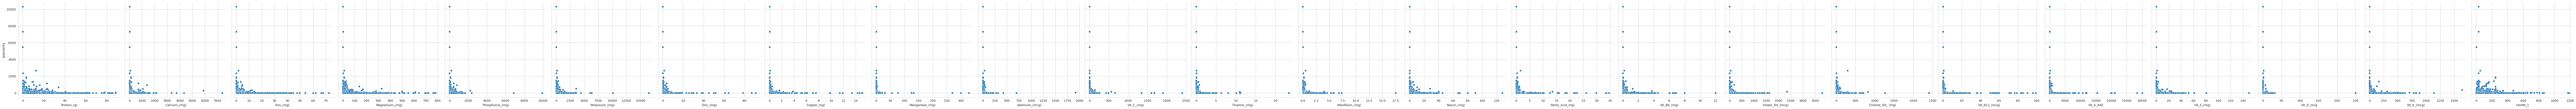

In [ ]:
sns.pairplot(df, y_vars = ['popularity'],
             x_vars = ['Protein_(g)',
       'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(mcg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(mcg)', 'Choline_Tot_ (mg)',
       'Vit_B12_(mcg)', 'Vit_A_RAE', 'Vit_E_(mg)', 'Vit_D_mcg',
       'Vit_K_(mcg)', 'GmWt_1'],height = 5)

plt.show()

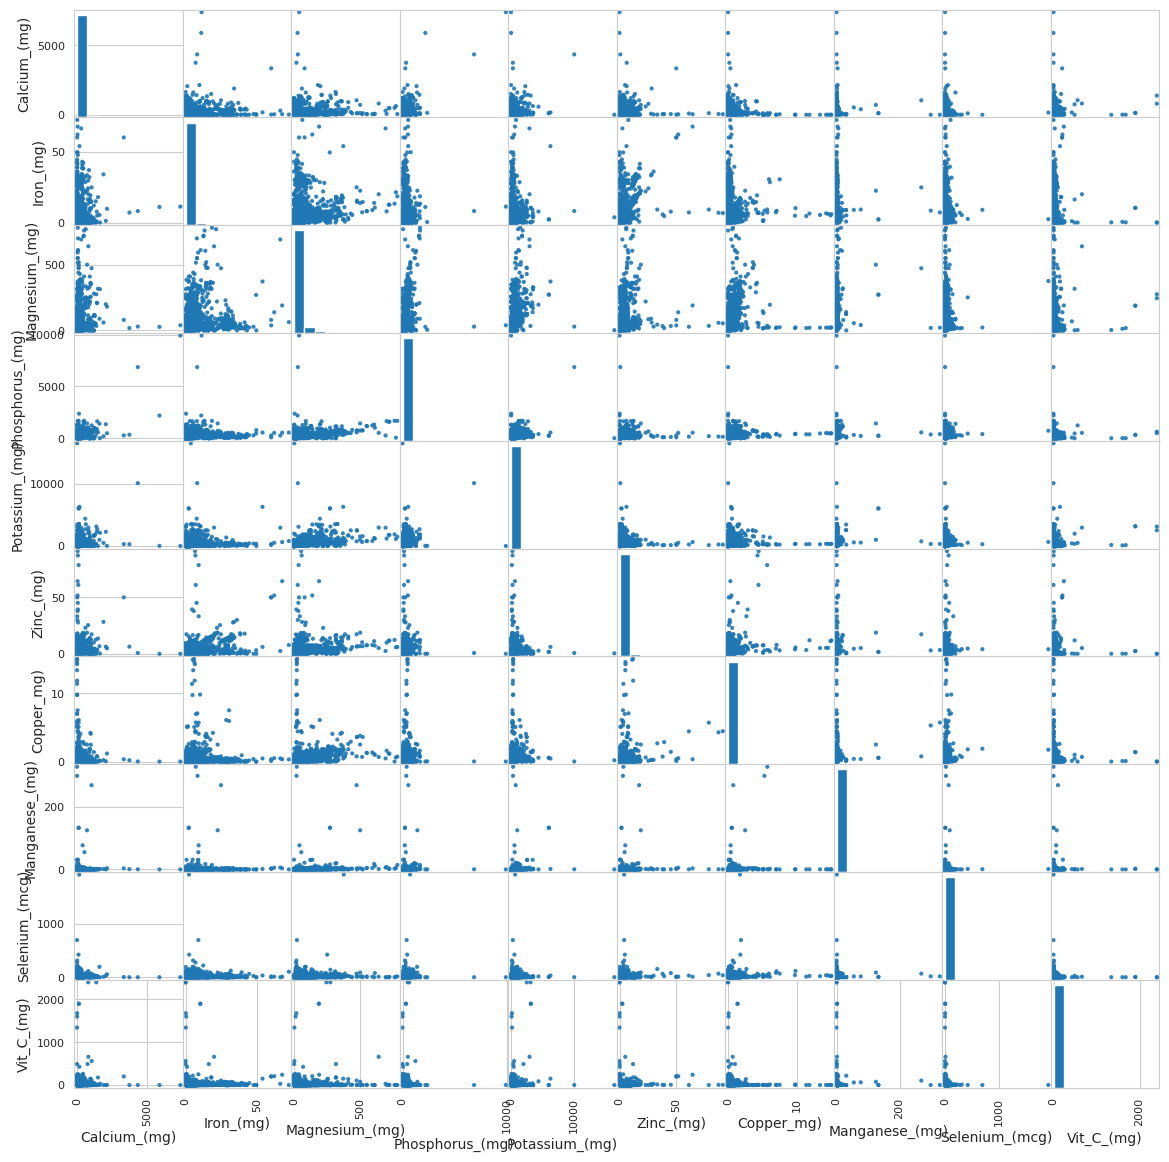

In [ ]:
pd.plotting.scatter_matrix(df[['Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Zinc_(mg)','Copper_mg)',
        'Manganese_(mg)', 'Selenium_(mcg)', 'Vit_C_(mg)']], 
        figsize=(14,14), alpha=.9)
plt.show()

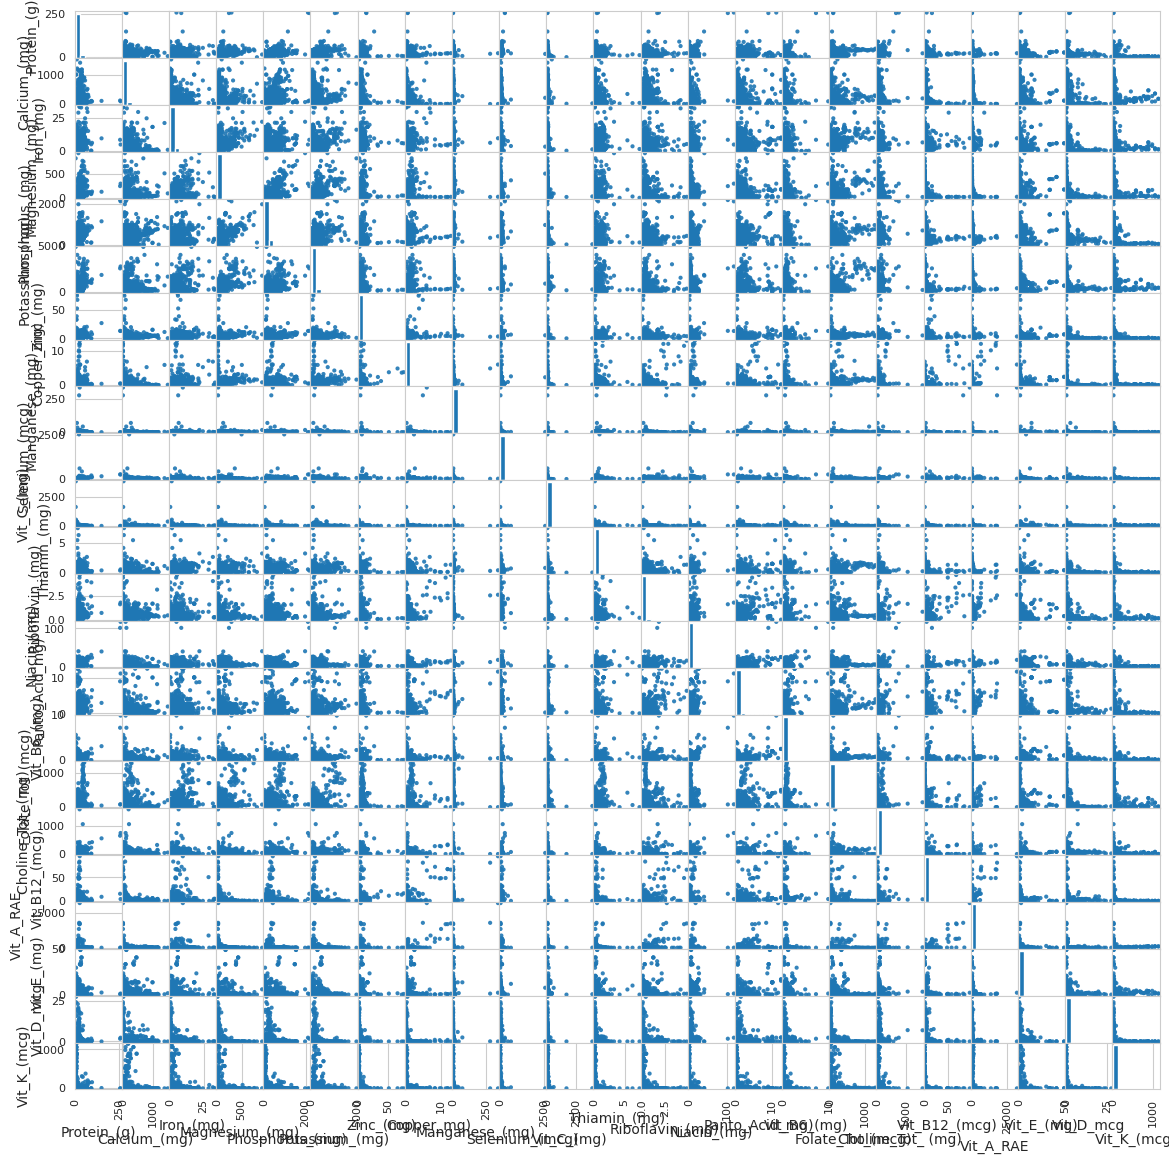

In [ ]:
pd.plotting.scatter_matrix(amount_per_common_measure_df[['Protein_(g)',
       'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(mcg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(mcg)', 'Choline_Tot_ (mg)',
       'Vit_B12_(mcg)', 'Vit_A_RAE', 'Vit_E_(mg)', 'Vit_D_mcg',
       'Vit_K_(mcg)']], 
        figsize=(14,14), alpha=.9)
plt.show()

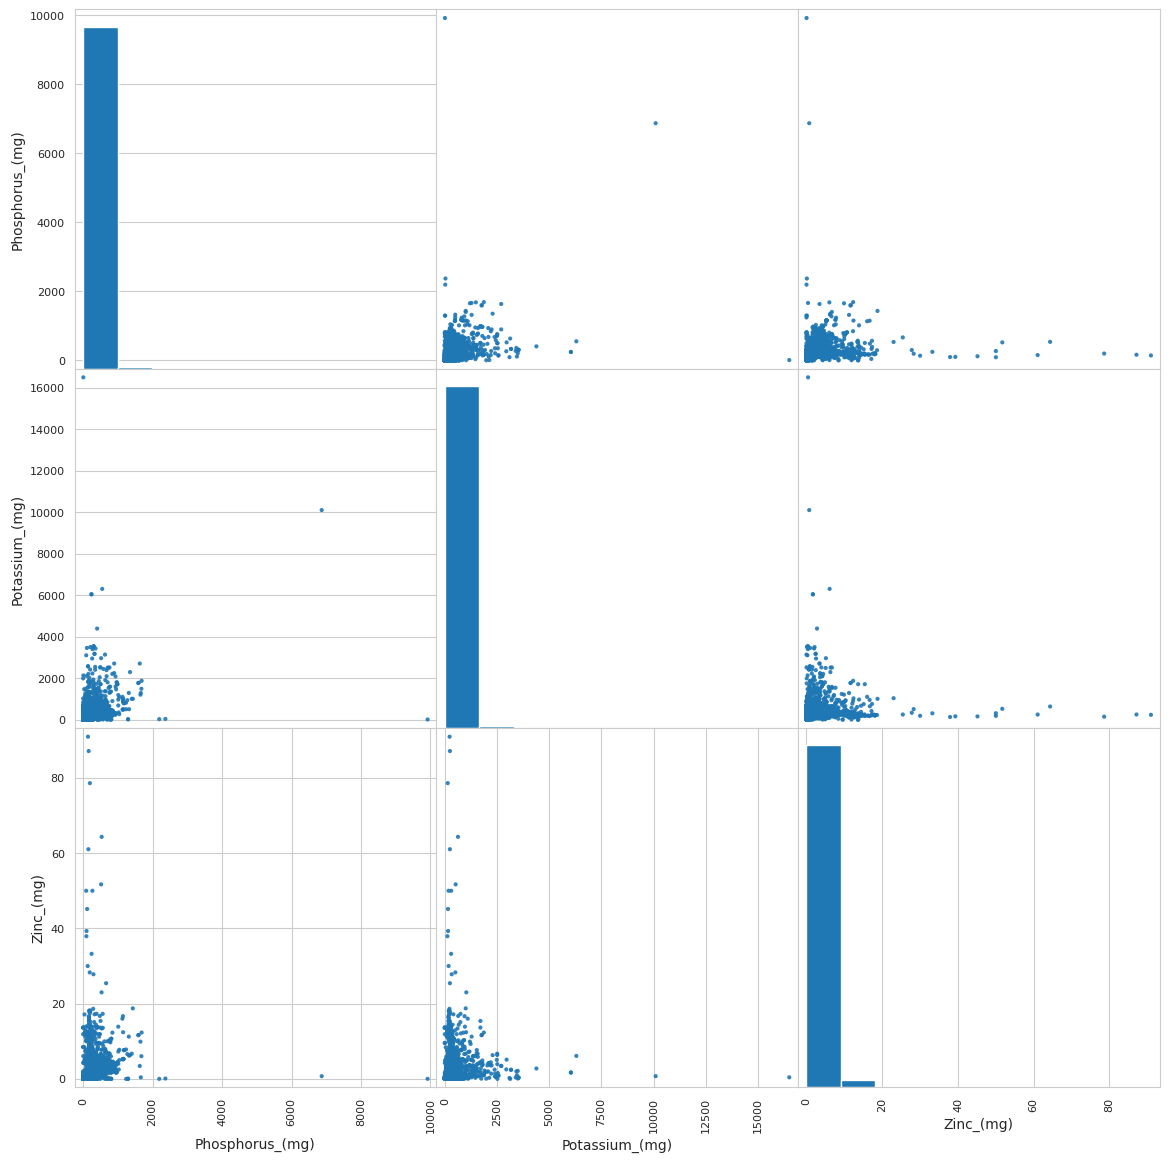

In [ ]:
pd.plotting.scatter_matrix(df[['Phosphorus_(mg)', 'Potassium_(mg)', 
                               'Zinc_(mg)']],
               figsize=(14,14), alpha=.9)
plt.show()

In [ ]:
numdf = df[['Protein_(g)',
       'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(mcg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(mcg)', 'Choline_Tot_ (mg)',
       'Vit_B12_(mcg)', 'Vit_A_RAE',  'Vit_E_(mg)', 'Vit_D_mcg',
       'Vit_K_(mcg)','GmWt_1', 'popularity']]

In [ ]:
numdf.describe()

,Protein_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(mcg),...,Vit_B6_(mg),Folate_Tot_(mcg),Choline_Tot_ (mg),Vit_B12_(mcg),Vit_A_RAE,Vit_E_(mg),Vit_D_mcg,Vit_K_(mcg),GmWt_1,popularity
count,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,...,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000,8407.000000
mean,11.634390,67.344713,2.469591,31.632092,156.046152,262.648983,1.966918,0.166288,0.463781,12.891864,...,0.262953,44.641489,23.944380,1.242761,91.198525,0.851656,0.333853,8.060319,95.601903,17.061972
std,10.607929,185.537145,4.763151,53.045567,203.822713,360.172066,3.387200,0.551609,6.343029,28.507361,...,0.466333,129.914608,52.226175,4.361415,787.279100,3.809630,3.119493,48.555400,84.911808,174.988153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.515000,8.000000,0.520000,10.000000,38.000000,115.000000,0.230000,0.026000,0.000000,0.100000,...,0.034000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.350000,0.000000
50%,8.380000,19.000000,1.360000,20.000000,135.000000,224.000000,0.820000,0.078000,0.022000,4.400000,...,0.122000,9.000000,0.300000,0.070000,1.000000,0.120000,0.000000,0.000000,85.000000,0.000000
75%,20.265000,61.000000,2.550000,29.000000,216.000000,329.000000,2.700000,0.139000,0.225000,21.700000,...,0.364000,35.000000,29.700000,1.335000,18.000000,0.440000,0.000000,1.700000,130.000000,0.000000
max,88.320000,7364.000000,72.350000,781.000000,9918.000000,16500.000000,90.950000,15.050000,328.000000,1917.000000,...,12.000000,3786.000000,2403.300000,98.890000,30000.000000,149.400000,250.000000,1640.000000,1184.000000,10331.000000


In [ ]:
numdf

,Protein_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(mcg),...,Vit_B6_(mg),Folate_Tot_(mcg),Choline_Tot_ (mg),Vit_B12_(mcg),Vit_A_RAE,Vit_E_(mg),Vit_D_mcg,Vit_K_(mcg),GmWt_1,popularity
0,0.85,24.0,0.02,2.0,24.0,24.0,0.09,0.000,0.000,1.0,...,0.003,3.0,18.8,0.17,684.0,2.32,0.0,7.0,5.00,1147.0
1,0.49,23.0,0.05,1.0,24.0,41.0,0.05,0.010,0.001,0.0,...,0.008,4.0,18.8,0.07,683.0,1.37,0.0,4.6,3.80,219.0
2,0.28,4.0,0.00,0.0,3.0,5.0,0.01,0.001,0.000,0.0,...,0.001,0.0,22.3,0.01,840.0,2.80,0.0,8.6,12.80,87.0
3,21.40,528.0,0.31,23.0,387.0,256.0,2.66,0.040,0.009,14.5,...,0.166,36.0,15.4,1.22,198.0,0.25,0.5,2.4,28.35,26.0
4,23.24,674.0,0.43,24.0,451.0,136.0,2.60,0.024,0.012,14.5,...,0.065,20.0,15.4,1.26,292.0,0.26,0.5,2.5,132.00,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,18.50,66.0,1.40,60.0,254.0,520.0,1.10,0.100,0.000,73.4,...,0.410,15.0,101.6,12.00,47.0,2.38,25.2,7.8,80.00,0.0
8403,20.54,10.0,0.58,37.0,426.0,314.0,1.55,0.033,0.029,21.7,...,0.112,20.0,110.7,2.15,2.0,0.00,0.0,0.0,85.00,0.0
8404,0.00,13.0,3.60,10.0,8.0,63.0,0.19,0.020,0.000,0.7,...,0.000,0.0,0.0,0.00,0.0,0.00,0.0,0.0,21.00,0.0
8405,16.10,10.0,3.50,250.0,272.0,382.0,1.00,0.400,0.000,27.4,...,0.130,6.0,65.0,0.50,30.0,5.00,0.0,0.1,85.00,0.0


In [ ]:
corrsdf = df[['Protein_(g)',
       'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)','Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(mcg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(mcg)', 'Choline_Tot_ (mg)',
       'Vit_B12_(mcg)', 'Vit_A_RAE', 'Vit_E_(mg)', 'Vit_D_mcg',
       'Vit_K_(mcg)', 'GmWt_1', 'popularity']].corr('pearson')

In [ ]:
df[df[ 'Phosphorus_(mg)']>=6000]

,NDB_No,Shrt_Desc,Protein_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Zinc_(mg),Copper_mg),...,Vit_B6_(mg),Folate_Tot_(mcg),Choline_Tot_ (mg),Vit_B12_(mcg),Vit_A_RAE,Vit_E_(mg),Vit_D_mcg,Vit_K_(mcg),GmWt_1,popularity
5472,18370,"LEAVENING AGENTS,BAKING PDR,DOUBLE-ACTING,STRA...",0.1,7364.0,11.27,39.0,9918.0,5.0,0.02,0.013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.6,9.0
5473,18371,"LEAVENING AGENTS,BAKING PDR,LOW-SODIUM",0.1,4332.0,8.17,29.0,6869.0,10100.0,0.72,0.019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [ ]:
df[df[ 'Potassium_(mg)']>=8000]

,NDB_No,Shrt_Desc,Protein_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Zinc_(mg),Copper_mg),...,Vit_B6_(mg),Folate_Tot_(mcg),Choline_Tot_ (mg),Vit_B12_(mcg),Vit_A_RAE,Vit_E_(mg),Vit_D_mcg,Vit_K_(mcg),GmWt_1,popularity
5473,18371,"LEAVENING AGENTS,BAKING PDR,LOW-SODIUM",0.1,4332.0,8.17,29.0,6869.0,10100.0,0.72,0.019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
5475,18373,"LEAVENING AGENTS,CRM OF TARTAR",0.0,8.0,3.72,2.0,5.0,16500.0,0.42,0.195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0


In [ ]:
corrsdf[abs(corrsdf) < 0.3] = 0
corrsdf[corrsdf == 1] = 0
corrsdf

,Protein_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(mcg),...,Vit_B6_(mg),Folate_Tot_(mcg),Choline_Tot_ (mg),Vit_B12_(mcg),Vit_A_RAE,Vit_E_(mg),Vit_D_mcg,Vit_K_(mcg),GmWt_1,popularity
Protein_(g),0.000000,0.000000,0.000000,0.000000,0.437498,0.000000,0.418429,0.000000,0.000000,0.379594,...,0.000000,0.000000,0.405894,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Calcium_(mg),0.000000,0.000000,0.000000,0.000000,0.591996,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Iron_(mg),0.000000,0.000000,0.000000,0.320495,0.000000,0.000000,0.425568,0.000000,0.000000,0.000000,...,0.521192,0.610763,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Magnesium_(mg),0.000000,0.000000,0.320495,0.000000,0.441799,0.465126,0.000000,0.324721,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Phosphorus_(mg),0.437498,0.591996,0.000000,0.441799,0.000000,0.370037,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Potassium_(mg),0.000000,0.000000,0.000000,0.465126,0.370037,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Zinc_(mg),0.418429,0.000000,0.425568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.450406,0.339434,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Copper_mg),0.000000,0.000000,0.000000,0.324721,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.583174,0.579042,0.000000,0.000000,0.0,0.0,0.0
Manganese_(mg),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.375839,0.000000,0.000000,0.0,0.0,0.0
Selenium_(mcg),0.379594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [ ]:
corrsdf.max()

Protein_(g)          0.437498
Calcium_(mg)         0.591996
Iron_(mg)            0.610763
Magnesium_(mg)       0.465126
Phosphorus_(mg)      0.591996
Potassium_(mg)       0.465126
Zinc_(mg)            0.473165
Copper_mg)           0.583174
Manganese_(mg)       0.375839
Selenium_(mcg)       0.379594
Vit_C_(mg)           0.000000
Thiamin_(mg)         0.613569
Riboflavin_(mg)      0.735109
Niacin_(mg)          0.735109
Panto_Acid_mg)       0.484317
Vit_B6_(mg)          0.725023
Folate_Tot_(mcg)     0.622929
Choline_Tot_ (mg)    0.405894
Vit_B12_(mcg)        0.583174
Vit_A_RAE            0.582931
Vit_E_(mg)           0.324435
Vit_D_mcg            0.384478
Vit_K_(mcg)          0.000000
GmWt_1               0.000000
popularity           0.000000
dtype: float64

In [ ]:
abs(corrsdf)>=0.7

,Protein_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(mcg),...,Vit_B6_(mg),Folate_Tot_(mcg),Choline_Tot_ (mg),Vit_B12_(mcg),Vit_A_RAE,Vit_E_(mg),Vit_D_mcg,Vit_K_(mcg),GmWt_1,popularity
Protein_(g),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Calcium_(mg),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Iron_(mg),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Magnesium_(mg),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Phosphorus_(mg),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Potassium_(mg),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Zinc_(mg),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Copper_mg),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Manganese_(mg),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Selenium_(mcg),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


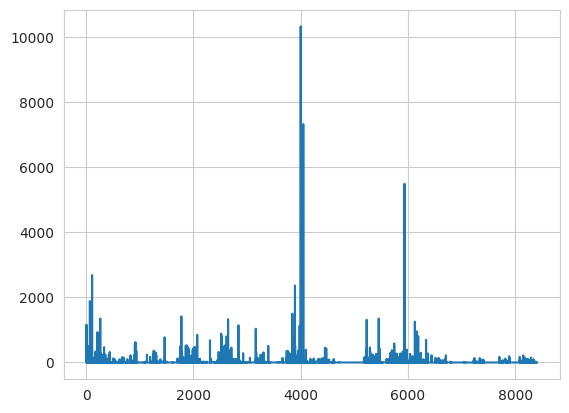

In [ ]:
plt.plot(df.popularity)

In [ ]:
np.mean(df.popularity)

17.0619721660521

In [ ]:
popular_foods = df[df.popularity >= df['popularity'].quantile(0.95)]


In [ ]:
popular_foods

,NDB_No,Shrt_Desc,Protein_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Zinc_(mg),Copper_mg),...,Vit_B6_(mg),Folate_Tot_(mcg),Choline_Tot_ (mg),Vit_B12_(mcg),Vit_A_RAE,Vit_E_(mg),Vit_D_mcg,Vit_K_(mcg),GmWt_1,popularity
0,1001,"BUTTER,WITH SALT",0.85,24.0,0.02,2.0,24.0,24.0,0.09,0.000,...,0.003,3.0,18.8,0.17,684.0,2.32,0.0,7.0,5.0,1147.0
1,1002,"BUTTER,WHIPPED,W/ SALT",0.49,23.0,0.05,1.0,24.0,41.0,0.05,0.010,...,0.008,4.0,18.8,0.07,683.0,1.37,0.0,4.6,3.8,219.0
2,1003,"BUTTER OIL,ANHYDROUS",0.28,4.0,0.00,0.0,3.0,5.0,0.01,0.001,...,0.001,0.0,22.3,0.01,840.0,2.80,0.0,8.6,12.8,87.0
8,1009,"CHEESE,CHEDDAR",22.87,710.0,0.14,27.0,455.0,76.0,3.64,0.030,...,0.066,27.0,16.5,1.10,330.0,0.71,0.6,2.4,132.0,1156.0
10,1011,"CHEESE,COLBY",23.76,685.0,0.76,26.0,457.0,127.0,3.07,0.042,...,0.079,18.0,15.4,0.83,264.0,0.28,0.6,2.7,132.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8229,42259,"SNACKS,POPCORN,HOME-PREPARED,OIL-POPPED,UNSALTED",9.00,10.0,2.78,108.0,250.0,225.0,2.64,0.221,...,0.210,17.0,16.0,0.00,8.0,2.43,0.0,4.3,8.0,110.0
8240,42283,"POTATO CHIPS,WHITE,RESTRUCTURED,BKD",5.00,125.0,0.80,43.0,274.0,721.0,0.45,0.104,...,0.510,0.0,31.6,0.00,0.0,2.18,0.0,7.2,34.0,94.0
8271,43060,"CHEWING GUM,SUGARLESS",0.00,20.0,0.00,0.0,0.0,0.0,0.00,0.000,...,0.000,0.0,0.0,0.00,0.0,0.00,0.0,0.0,2.0,68.0
8293,43158,"SWEETENERS,TABLETOP,SACCHARIN (SODIUM SACCHARIN)",0.94,0.0,0.04,0.0,0.0,4.0,0.01,0.000,...,0.000,0.0,0.0,0.00,0.0,0.00,0.0,0.0,1.0,153.0


In [ ]:

#Data gathering and defining stakeholders + KPIs
#Find the dataset you will be working with. Describe the dataset and the problem you are looking to solve (1 page max). List the stakeholders of the project and company key performance indicators (KPIs) (bullet points).


#Data cleaning + preprocessing
#Look for missing values and duplicates. Basic data manipulation & preliminary feature engineering.

#Exploratory data analysis + visualizations [Checkpoint]
#Distributions of variables, looking for outliers, etc. Descriptive statistics.

#Written proposal of modeling approach [Checkpoint]
#Test linearity assumptions. Dimensionality reductions (if necessary). Describe your planned modeling approach, based on the exploratory data analysis from the last two weeks (< 1 page, bullet points).

In [ ]:
del corrsdf, popular_foods, numdf

# Scaling and PCA if needed? need to go back to original features

Using all foods

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
numdf = df[['Protein_(g)',
       'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(mcg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(mcg)','Choline_Tot_ (mg)',
       'Vit_B12_(mcg)', 'Vit_A_RAE', 'Vit_E_(mg)', 'Vit_D_mcg',
       'Vit_K_(mcg)']]


features = numdf.columns

pipe = Pipeline([('scale', StandardScaler()),
                   ('pca', PCA())])

fit = pipe.fit_transform(numdf[features])

pipe['pca'].components_.shape

(23, 23)

In [ ]:
fit.shape

(8407, 23)

In [ ]:
numdf.shape

(8407, 23)

In [ ]:
pipe['pca'].explained_variance_ratio_

array([0.24829735, 0.09419277, 0.08655491, 0.06905325, 0.04958132,
       0.04849786, 0.04701898, 0.04213714, 0.04181078, 0.03681189,
       0.03338131, 0.03263753, 0.02668375, 0.02359805, 0.02251472,
       0.01939751, 0.01639127, 0.0129905 , 0.01245711, 0.01142312,
       0.0099104 , 0.00795583, 0.00670263])

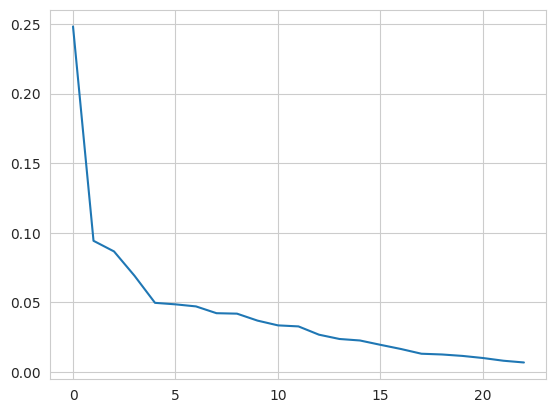

In [ ]:
plt.plot(pipe['pca'].explained_variance_ratio_)

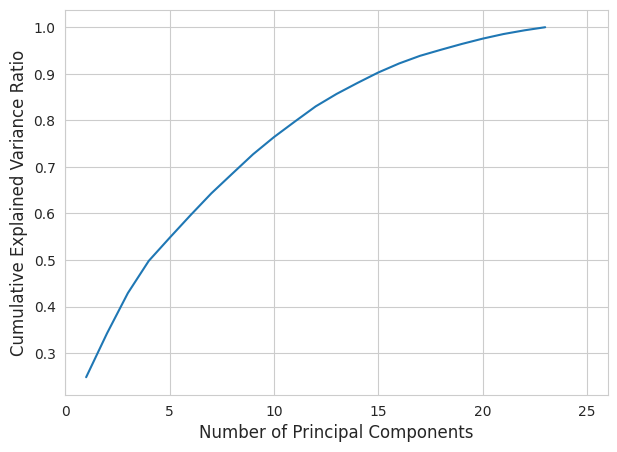

In [ ]:
plt.figure(figsize=(7,5))


plt.plot(range(1, len(pipe['pca'].explained_variance_ratio_)+1),
            np.cumsum(pipe['pca'].explained_variance_ratio_))

plt.ylabel("Cumulative Explained Variance Ratio", fontsize=12)
plt.xlabel("Number of Principal Components", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlim(0,26)

plt.show()

In [ ]:
df.head(50)

,NDB_No,Shrt_Desc,Protein_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Zinc_(mg),Copper_mg),...,Folate_Tot_(mcg),Choline_Tot_ (mg),Vit_B12_(mcg),Vit_A_RAE,Vit_E_(mg),Vit_D_mcg,Vit_D_IU,Vit_K_(mcg),GmWt_1,popularity
0,1001,"BUTTER,WITH SALT",0.85,24.0,0.02,2.0,24.0,24.0,0.09,0.000,...,3.0,18.8,0.17,684.0,2.32,0.0,0.0,7.0,5.00,1147.0
1,1002,"BUTTER,WHIPPED,W/ SALT",0.49,23.0,0.05,1.0,24.0,41.0,0.05,0.010,...,4.0,18.8,0.07,683.0,1.37,0.0,0.0,4.6,3.80,219.0
2,1003,"BUTTER OIL,ANHYDROUS",0.28,4.0,0.00,0.0,3.0,5.0,0.01,0.001,...,0.0,22.3,0.01,840.0,2.80,0.0,0.0,8.6,12.80,87.0
3,1004,"CHEESE,BLUE",21.40,528.0,0.31,23.0,387.0,256.0,2.66,0.040,...,36.0,15.4,1.22,198.0,0.25,0.5,21.0,2.4,28.35,26.0
4,1005,"CHEESE,BRICK",23.24,674.0,0.43,24.0,451.0,136.0,2.60,0.024,...,20.0,15.4,1.26,292.0,0.26,0.5,22.0,2.5,132.00,6.0
5,1006,"CHEESE,BRIE",20.75,184.0,0.50,20.0,188.0,152.0,2.38,0.019,...,65.0,15.4,1.65,174.0,0.24,0.5,20.0,2.3,28.35,5.0
6,1007,"CHEESE,CAMEMBERT",19.80,388.0,0.33,20.0,347.0,187.0,2.38,0.021,...,62.0,15.4,1.30,241.0,0.21,0.4,18.0,2.0,28.35,0.0
7,1008,"CHEESE,CARAWAY",25.18,673.0,0.64,22.0,490.0,93.0,2.94,0.024,...,18.0,0.0,0.27,271.0,0.00,0.0,0.0,0.0,28.35,0.0
8,1009,"CHEESE,CHEDDAR",22.87,710.0,0.14,27.0,455.0,76.0,3.64,0.030,...,27.0,16.5,1.10,330.0,0.71,0.6,24.0,2.4,132.00,1156.0
9,1010,"CHEESE,CHESHIRE",23.37,643.0,0.21,21.0,464.0,95.0,2.79,0.042,...,18.0,0.0,0.83,233.0,0.00,0.0,0.0,0.0,28.35,0.0


In [ ]:
component_vectors = pd.DataFrame(pipe['pca'].components_.transpose(),
                                    index = numdf.columns)

In [ ]:
abs(component_vectors)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Protein_(g),0.182752,0.244232,0.337849,0.317227,0.023191,0.051546,0.076406,0.039068,0.057055,0.092245,...,0.127158,0.336982,0.125281,0.260406,0.277899,0.180599,0.088187,0.426845,0.033198,0.109575
Calcium_(mg),0.128376,0.026333,0.250647,0.391026,0.315437,0.160029,0.245972,0.051194,0.478884,0.122374,...,0.038032,0.113429,0.113648,0.044876,0.197858,0.238700,0.211576,0.371957,0.010379,0.133188
Iron_(mg),0.276503,0.209884,0.035806,0.001685,0.167642,0.109745,0.071896,0.111333,0.105717,0.107600,...,0.084086,0.090489,0.244206,0.614879,0.181964,0.033868,0.198861,0.001747,0.022139,0.045352
Magnesium_(mg),0.207745,0.006140,0.267404,0.328650,0.106423,0.186900,0.026569,0.017404,0.371361,0.238541,...,0.331360,0.182718,0.311730,0.122648,0.123726,0.145407,0.406479,0.024736,0.225424,0.080211
Phosphorus_(mg),0.200894,0.146941,0.417589,0.222781,0.247720,0.045327,0.130172,0.012148,0.191653,0.052214,...,0.070502,0.224834,0.085481,0.058744,0.238633,0.278086,0.340673,0.508450,0.049070,0.097767
Potassium_(mg),0.150089,0.078583,0.296274,0.309069,0.089689,0.033957,0.340314,0.062915,0.331506,0.026701,...,0.468513,0.440379,0.304280,0.042875,0.022733,0.038861,0.072980,0.026675,0.034008,0.049093
Zinc_(mg),0.258837,0.028452,0.106195,0.214344,0.087525,0.069675,0.129327,0.059174,0.021453,0.230114,...,0.360799,0.116409,0.555550,0.122665,0.003943,0.014445,0.033429,0.153925,0.135024,0.002651
Copper_mg),0.187406,0.376583,0.175364,0.150165,0.031060,0.301224,0.083816,0.198214,0.018085,0.366060,...,0.163036,0.080308,0.029221,0.026331,0.071274,0.279118,0.234170,0.116417,0.513056,0.133941
Manganese_(mg),0.095682,0.213472,0.166094,0.254297,0.143485,0.157286,0.109788,0.422132,0.201048,0.593336,...,0.090200,0.132614,0.096209,0.055318,0.003933,0.007677,0.006300,0.021452,0.223638,0.110400
Selenium_(mcg),0.115411,0.227246,0.197782,0.282677,0.070349,0.066794,0.028180,0.074502,0.037726,0.138953,...,0.043861,0.196119,0.082473,0.066969,0.031223,0.079039,0.057154,0.007957,0.010295,0.003483


In [ ]:
component_vectors[abs(component_vectors[0])>0.15]

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Protein_(g),0.182752,0.244232,-0.337849,-0.317227,-0.023191,0.051546,0.076406,-0.039068,0.057055,0.092245,...,0.127158,-0.336982,-0.125281,-0.260406,-0.277899,-0.180599,0.088187,-0.426845,-0.033198,0.109575
Iron_(mg),0.276503,-0.209884,0.035806,-0.001685,0.167642,-0.109745,-0.071896,0.111333,0.105717,-0.107600,...,0.084086,0.090489,-0.244206,-0.614879,0.181964,0.033868,-0.198861,0.001747,-0.022139,0.045352
Magnesium_(mg),0.207745,0.006140,-0.267404,0.328650,-0.106423,-0.186900,0.026569,-0.017404,0.371361,-0.238541,...,-0.331360,-0.182718,-0.311730,0.122648,0.123726,0.145407,0.406479,-0.024736,-0.225424,-0.080211
Phosphorus_(mg),0.200894,0.146941,-0.417589,0.222781,0.247720,0.045327,-0.130172,0.012148,-0.191653,0.052214,...,0.070502,-0.224834,-0.085481,0.058744,-0.238633,0.278086,-0.340673,0.508450,0.049070,0.097767
Potassium_(mg),0.150089,0.078583,-0.296274,0.309069,-0.089689,-0.033957,0.340314,-0.062915,0.331506,-0.026701,...,0.468513,0.440379,0.304280,-0.042875,0.022733,-0.038861,-0.072980,-0.026675,-0.034008,-0.049093
Zinc_(mg),0.258837,0.028452,-0.106195,-0.214344,-0.087525,-0.069675,-0.129327,0.059174,-0.021453,-0.230114,...,-0.360799,0.116409,0.555550,0.122665,-0.003943,0.014445,0.033429,0.153925,-0.135024,0.002651
Copper_mg),0.187406,0.376583,0.175364,0.150165,0.031060,-0.301224,0.083816,0.198214,-0.018085,-0.366060,...,-0.163036,-0.080308,0.029221,0.026331,0.071274,-0.279118,-0.234170,-0.116417,0.513056,0.133941
Thiamin_(mg),0.247248,-0.286077,0.068484,-0.057532,0.177801,-0.104103,0.016227,0.053349,0.152892,0.247964,...,-0.184746,-0.244770,0.365286,-0.103949,0.211000,0.240661,-0.301270,-0.253394,-0.145165,-0.023618
Riboflavin_(mg),0.337323,-0.107813,0.170900,-0.062019,0.110465,-0.005248,0.146934,0.050248,-0.122772,0.132346,...,0.083657,0.036997,0.076011,-0.113140,0.026254,-0.136929,0.514259,0.321910,-0.000471,0.560511
Niacin_(mg),0.340013,-0.176395,0.022509,-0.178163,-0.022919,0.067106,0.117544,-0.097660,0.007586,0.123834,...,0.065514,-0.102241,-0.132724,0.047524,0.214591,-0.267812,0.072364,0.316157,0.297184,-0.622060


In [ ]:
fewercols = df[component_vectors[abs(component_vectors[0])>0.15].index]

In [ ]:
fit = pd.DataFrame(fit)

In [ ]:
fit20 = fit.iloc[:, :20]

In [ ]:
fit20

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.715488,0.082466,1.132610,0.289470,-0.162079,0.160863,-0.436533,-0.068201,-0.226908,-0.138044,0.075994,0.286772,0.348880,0.022733,-0.092686,0.117344,0.038534,-0.015103,-0.211392,-0.063161
1,-1.730113,0.080060,1.136995,0.273763,0.003651,0.126906,-0.288832,-0.072877,-0.199754,-0.090908,0.008675,0.302719,0.357377,-0.026497,-0.002417,0.086681,0.081587,-0.003385,-0.224449,-0.062078
2,-1.797267,0.121775,1.305427,0.279266,-0.258662,0.215135,-0.463362,-0.048043,-0.164901,-0.190152,0.063740,0.307102,0.422722,0.062031,-0.202063,0.147480,0.025376,0.003892,-0.290821,-0.117807
3,0.568726,0.663484,-1.325012,0.848891,0.914226,0.576460,-0.949043,-0.114853,-1.648552,0.559102,-0.140138,0.031610,-0.608984,-0.219728,0.519683,-0.007302,-0.033747,-0.468647,-0.425192,0.421611
4,0.238748,0.786190,-1.677884,1.164935,1.615101,0.718770,-1.079447,0.139729,-1.994016,0.547615,-0.054035,-0.336118,-0.288073,-0.057154,-0.289367,0.339117,-0.017547,-0.312569,-0.562902,0.713021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8402,1.558288,2.756471,0.380803,-0.482624,1.475603,5.883533,-1.326950,0.062087,3.157241,-1.141821,1.466567,-0.377173,-0.206920,0.670193,0.702842,0.189750,0.235001,0.445655,2.806137,1.263151
8403,-0.155398,1.329956,-1.447460,-0.546369,-0.043421,0.396616,0.008305,0.092659,-0.021857,0.202845,-0.412322,0.588958,0.682946,0.122755,-0.478408,-0.223393,0.037548,-0.579146,0.628140,-0.260247
8404,-1.686509,-0.518300,0.834922,0.174475,0.279697,-0.304700,-0.144493,-0.057495,0.030862,-0.138662,0.055201,-0.060924,0.401941,-0.179538,0.228248,-0.061165,-0.319259,0.293389,0.145586,-0.096305
8405,0.734897,0.803779,-1.851410,1.297253,-1.045035,-0.697154,-0.270420,-0.046249,1.680390,-1.487987,0.900392,0.442337,0.774869,-0.719553,-1.273642,-1.142741,-0.025608,0.383200,0.492857,1.354554


In [ ]:
# PCA on amount_per_common_measure_df
adjnumdf = amount_per_common_measure_df[['Protein_(g)',
       'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(mcg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(mcg)','Choline_Tot_ (mg)',
       'Vit_B12_(mcg)', 'Vit_A_RAE', 'Vit_E_(mg)', 'Vit_D_mcg',
       'Vit_K_(mcg)']]


features = adjnumdf.columns

pipe = Pipeline([('scale', StandardScaler()),
                   ('pca', PCA())])

fit = pipe.fit_transform(adjnumdf[features])

pipe['pca'].components_.shape

(23, 23)

In [ ]:
pipe['pca'].explained_variance_ratio_

array([0.29831666, 0.10455068, 0.07985202, 0.05194674, 0.04926453,
       0.04501384, 0.04108527, 0.04086757, 0.03760683, 0.03672655,
       0.03489866, 0.02941354, 0.02536294, 0.02323216, 0.01772155,
       0.01486192, 0.01436475, 0.01415909, 0.01211094, 0.01082625,
       0.00696919, 0.00608583, 0.00476247])

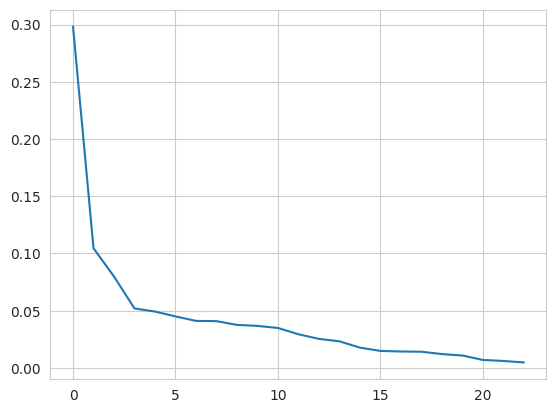

In [ ]:
plt.plot(pipe['pca'].explained_variance_ratio_)

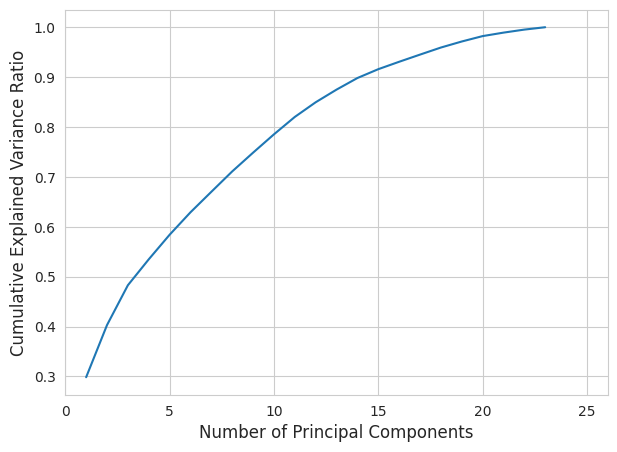

In [ ]:
plt.figure(figsize=(7,5))


plt.plot(range(1, len(pipe['pca'].explained_variance_ratio_)+1),
            np.cumsum(pipe['pca'].explained_variance_ratio_))

plt.ylabel("Cumulative Explained Variance Ratio", fontsize=12)
plt.xlabel("Number of Principal Components", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlim(0,26)

plt.show()

In [ ]:
component_vectors = pd.DataFrame(pipe['pca'].components_.transpose(),
                                    index = adjnumdf.columns)
component_vectors[abs(component_vectors[0])>0.15]

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
Protein_(g),0.283364,-0.133462,0.306681,-0.071238,0.161536,0.084307,0.045854,-0.044125,0.095042,0.152164,...,0.022520,-0.150446,-0.390383,-0.291030,-0.151295,-0.084453,-0.194243,0.009950,0.075062,0.623886
Iron_(mg),0.253591,-0.049619,-0.220121,-0.254586,-0.148181,-0.069376,0.066084,-0.179238,-0.118819,-0.117388,...,-0.252586,-0.459231,-0.074277,0.302626,0.327259,0.131687,-0.329578,-0.081729,-0.001649,0.006013
Magnesium_(mg),0.252639,-0.182787,-0.313599,-0.062275,0.200637,0.075759,-0.042827,0.176932,0.205528,-0.139374,...,0.096860,-0.104927,0.022055,0.097446,0.243464,0.056165,0.523509,0.211451,-0.381665,0.245195
Phosphorus_(mg),0.312596,-0.154285,-0.001433,0.027374,0.249953,-0.042487,-0.009078,0.135574,0.064776,0.171279,...,0.086588,-0.052860,-0.225064,-0.278405,0.192581,0.210841,0.140939,-0.523798,0.170561,-0.460564
Potassium_(mg),0.255405,-0.177129,-0.203010,-0.029526,0.188864,0.127274,0.106457,0.009306,0.325057,-0.050036,...,-0.115181,0.030846,0.032739,0.345799,-0.560207,-0.036896,-0.320764,-0.023613,-0.056174,-0.209488
Zinc_(mg),0.218229,-0.042032,0.177956,-0.227042,0.195121,0.139042,0.099665,-0.034196,-0.214546,-0.151809,...,0.142265,0.400116,0.140076,0.090217,-0.107332,-0.175044,0.082609,-0.031806,-0.116068,-0.097603
Copper_mg),0.217782,0.300206,-0.184397,-0.126003,0.198576,0.060487,0.074095,0.075232,-0.154078,-0.327451,...,0.224337,0.007512,0.181918,-0.140893,0.239776,-0.187186,-0.194917,0.181718,0.477864,0.029603
Thiamin_(mg),0.217771,-0.100552,-0.173623,-0.153661,-0.320912,-0.199899,0.000370,-0.087089,-0.040756,0.101010,...,0.723330,0.113361,0.046481,-0.011122,-0.150969,0.165634,-0.127044,-0.027020,-0.056160,0.061389
Riboflavin_(mg),0.272256,0.189541,0.024781,0.068524,-0.131827,-0.168227,0.037285,-0.113287,-0.349922,0.169877,...,-0.006526,-0.210207,-0.195735,0.329947,-0.230572,-0.409433,0.455350,-0.083446,0.134954,-0.023074
Niacin_(mg),0.276521,-0.065919,0.318379,0.002098,-0.296533,0.049541,-0.085945,-0.053620,0.093071,0.141328,...,0.006167,-0.138770,-0.024331,-0.213799,0.123022,-0.189311,-0.095595,0.521051,-0.187235,-0.449721


In [ ]:
adjfewercols = amount_per_common_measure_df[component_vectors[
    abs(component_vectors[0])>0.15].index]

In [ ]:
del fit, component_vectors, pipe, features

# KMeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
# k-Means using the fewer columns data frame (scroll down for others)
sils = []

for k in range(2,26):
    kmeans = KMeans(k, n_init='auto').fit(fewercols)
    
    sils.append(silhouette_score(fewercols, kmeans.predict(fewercols)))

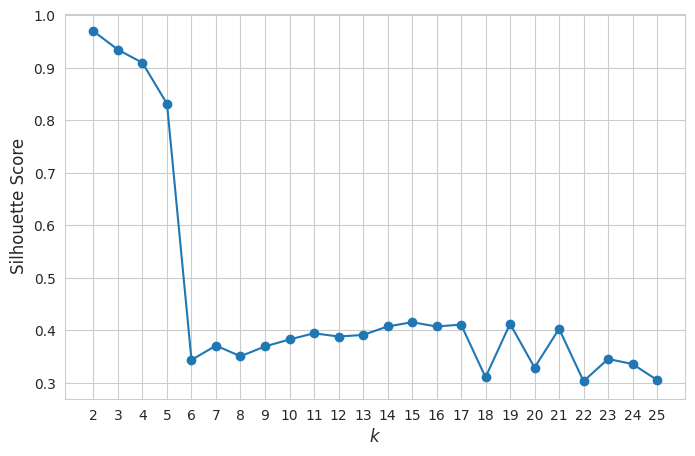

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(range(2,26), sils, '-o')

plt.xlabel("$k$", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)

plt.xticks(range(2,26),fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
## a loop to record inertias
inertias = []

for k in range(1,26):
    kmeans = KMeans(k,
                    n_init='auto')
    kmeans.fit(fewercols)
    
    ## you can get the inertia from a fit KMeans object
    ## with .inertia_
    inertias.append(kmeans.inertia_)

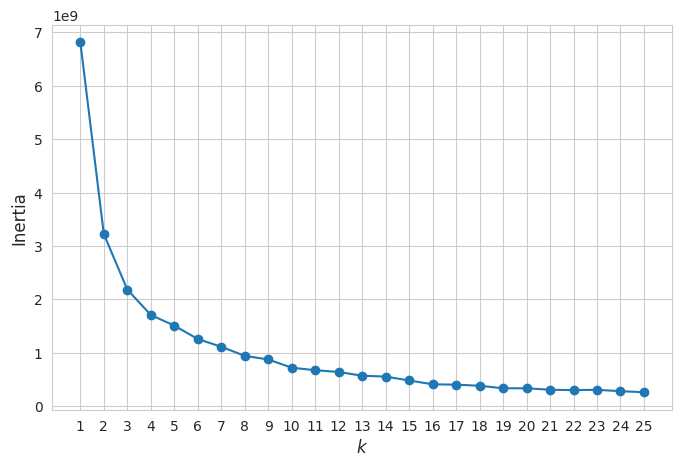

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(range(1,26), inertias, '-o')

plt.xlabel("$k$", fontsize=12)
plt.ylabel("Inertia", fontsize=12)

plt.xticks(range(1,26),fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
## Make a KMeans object
kmeans = KMeans(18,
                n_init='auto')

## Fit the kmeans object
kmeans.fit(fewercols)


## get the clusters
microclusters = kmeans.predict(fewercols)

In [ ]:
## Make a KMeans object
kmeans = KMeans(6,
                n_init='auto')

## Fit the kmeans object
kmeans.fit(fewercols)


## get the clusters
macroclusters = kmeans.predict(fewercols)

In [ ]:
clustered_df = df[['Shrt_Desc']]
clustered_df['fewermicro'] = microclusters
clustered_df['fewermacro'] = macroclusters
clustered_df.head(20)
# several different clusters for cheeses...

<ipython-input-51-a4fe6f165e02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_df['fewermicro'] = microclusters
<ipython-input-51-a4fe6f165e02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_df['fewermacro'] = macroclusters


,Shrt_Desc,fewermicro,fewermacro
0,"BUTTER,WITH SALT",6,0
1,"BUTTER,WHIPPED,W/ SALT",6,0
2,"BUTTER OIL,ANHYDROUS",6,0
3,"CHEESE,BLUE",0,5
4,"CHEESE,BRICK",0,5
5,"CHEESE,BRIE",3,0
6,"CHEESE,CAMEMBERT",0,5
7,"CHEESE,CARAWAY",0,5
8,"CHEESE,CHEDDAR",0,5
9,"CHEESE,CHESHIRE",0,5


In [ ]:
# now using all target nutrient columns
sils = []

for k in range(2,26):
    kmeans = KMeans(k, n_init='auto').fit(numdf)
    
    sils.append(silhouette_score(numdf, kmeans.predict(numdf)))

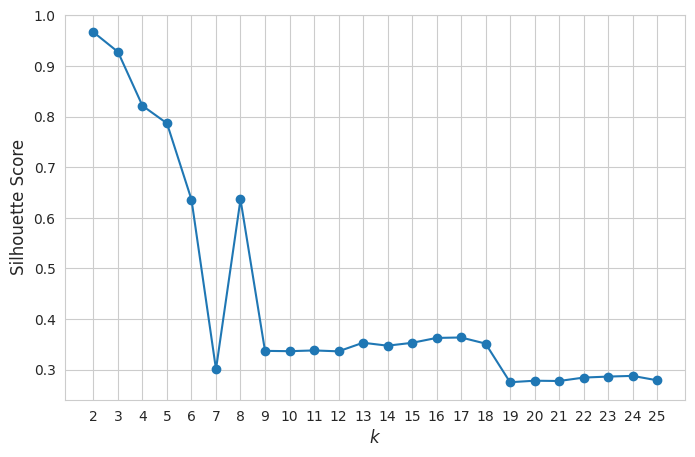

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(range(2,26), sils, '-o')

plt.xlabel("$k$", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)

plt.xticks(range(2,26),fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
## a loop to record inertias
inertias = []

for k in range(1,26):
    kmeans = KMeans(k,
                    n_init='auto')
    kmeans.fit(numdf)
    
    ## you can get the inertia from a fit KMeans object
    ## with .inertia_
    inertias.append(kmeans.inertia_)

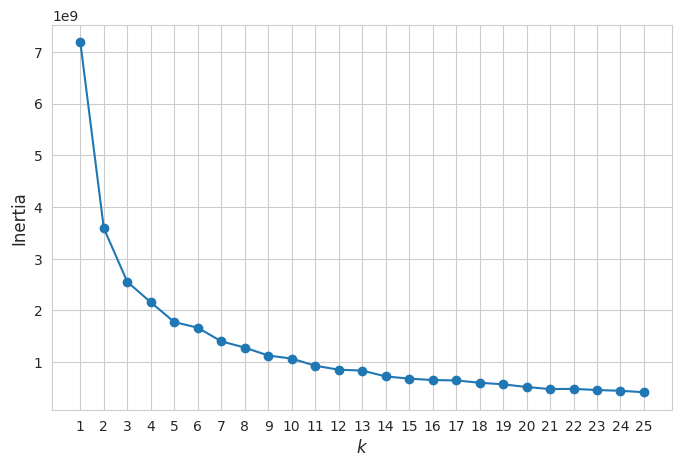

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(range(1,26), inertias, '-o')

plt.xlabel("$k$", fontsize=12)
plt.ylabel("Inertia", fontsize=12)

plt.xticks(range(1,26),fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
## Make a KMeans object
kmeans = KMeans(19,
                n_init='auto')

## Fit the kmeans object
kmeans.fit(numdf)


## get the clusters
microclusters = kmeans.predict(numdf)

In [ ]:
## Make a KMeans object
kmeans = KMeans(7,
                n_init='auto')

## Fit the kmeans object
kmeans.fit(numdf)


## get the clusters
macroclusters = kmeans.predict(numdf)

In [ ]:
clustered_df['allmicro'] = microclusters
clustered_df['allmacro'] = macroclusters
clustered_df.head(20)
# looks like all columns does a better job classifying cheeses
# but not by much

<ipython-input-58-fb497f102e80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_df['allmicro'] = microclusters
<ipython-input-58-fb497f102e80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_df['allmacro'] = macroclusters


,Shrt_Desc,fewermicro,fewermacro,allmicro,allmacro
0,"BUTTER,WITH SALT",6,0,7,0
1,"BUTTER,WHIPPED,W/ SALT",6,0,7,0
2,"BUTTER OIL,ANHYDROUS",6,0,7,0
3,"CHEESE,BLUE",0,5,13,4
4,"CHEESE,BRICK",0,5,13,4
5,"CHEESE,BRIE",3,0,8,0
6,"CHEESE,CAMEMBERT",0,5,8,4
7,"CHEESE,CARAWAY",0,5,13,4
8,"CHEESE,CHEDDAR",0,5,13,4
9,"CHEESE,CHESHIRE",0,5,13,4


In [ ]:
# k-Means using the transformed PCA data frame
sils = []

for k in range(2,26):
    kmeans = KMeans(k, n_init='auto').fit(fit20)
    
    sils.append(silhouette_score(fit20, kmeans.predict(fit20)))

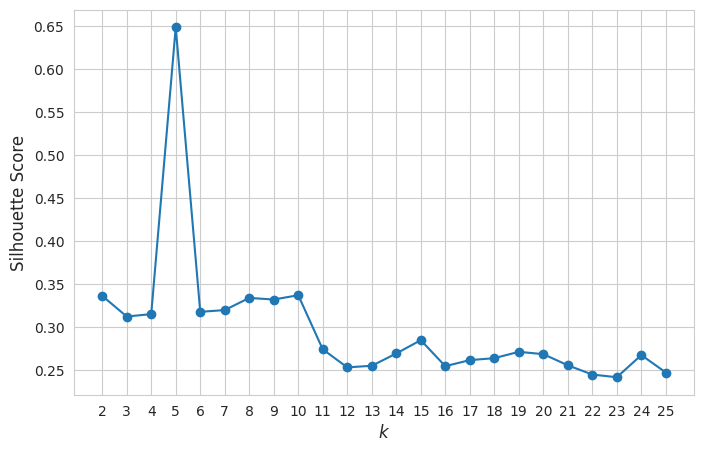

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(range(2,26), sils, '-o')

plt.xlabel("$k$", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)

plt.xticks(range(2,26),fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
## a loop to record inertias
inertias = []

for k in range(1,26):
    kmeans = KMeans(k,
                    n_init='auto')
    kmeans.fit(fit20)
    
    ## you can get the inertia from a fit KMeans object
    ## with .inertia_
    inertias.append(kmeans.inertia_)

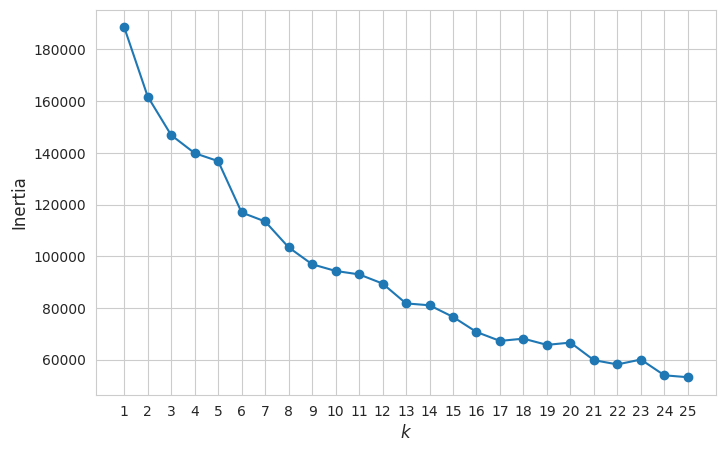

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(range(1,26), inertias, '-o')

plt.xlabel("$k$", fontsize=12)
plt.ylabel("Inertia", fontsize=12)

plt.xticks(range(1,26),fontsize=10)
plt.yticks(fontsize=10)

plt.show()

# inertia is in the hundreds of thousands

In [ ]:
## Make a KMeans object
kmeans = KMeans(25,
                n_init='auto')

## Fit the kmeans object
kmeans.fit(fit20)


## get the clusters
microclusters = kmeans.predict(fit20)

In [ ]:
## Make a KMeans object
kmeans = KMeans(13,
                n_init='auto')

## Fit the kmeans object
kmeans.fit(fit20)


## get the clusters
macroclusters = kmeans.predict(fit20)

In [ ]:
clustered_df['fitmicro'] = microclusters
clustered_df['fitmacro'] = macroclusters
clustered_df.head(20)
# best so far with cheeses, but butter is in the same micro cluster as milk
# seems like they should be in different groups?

<ipython-input-65-138f921952f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_df['fitmicro'] = microclusters
<ipython-input-65-138f921952f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_df['fitmacro'] = macroclusters


,Shrt_Desc,fewermicro,fewermacro,allmicro,allmacro,fitmicro,fitmacro
0,"BUTTER,WITH SALT",6,0,7,0,13,1
1,"BUTTER,WHIPPED,W/ SALT",6,0,7,0,13,1
2,"BUTTER OIL,ANHYDROUS",6,0,7,0,13,1
3,"CHEESE,BLUE",0,5,13,4,21,2
4,"CHEESE,BRICK",0,5,13,4,21,2
5,"CHEESE,BRIE",3,0,8,0,1,2
6,"CHEESE,CAMEMBERT",0,5,8,4,1,2
7,"CHEESE,CARAWAY",0,5,13,4,21,2
8,"CHEESE,CHEDDAR",0,5,13,4,21,2
9,"CHEESE,CHESHIRE",0,5,13,4,21,2


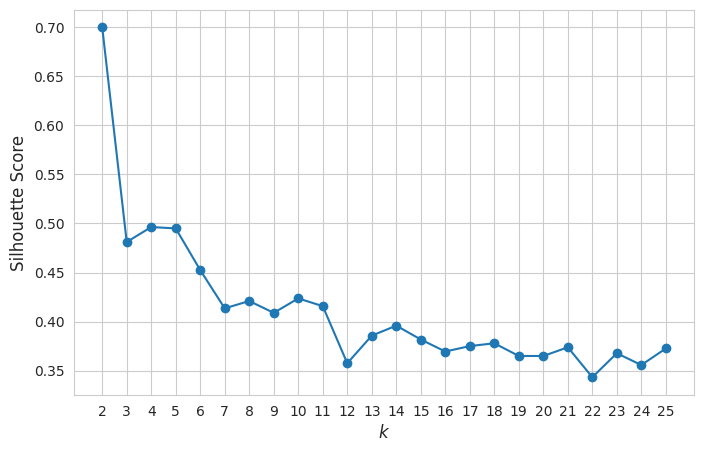

In [ ]:
# k-Means using the adjusted fewer columns data frame
sils = []

for k in range(2,26):
    kmeans = KMeans(k, n_init='auto').fit(adjfewercols)
    
    sils.append(silhouette_score(adjfewercols, kmeans.predict(adjfewercols)))

plt.figure(figsize=(8,5))

plt.plot(range(2,26), sils, '-o')

plt.xlabel("$k$", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)

plt.xticks(range(2,26),fontsize=10)
plt.yticks(fontsize=10)

plt.show()


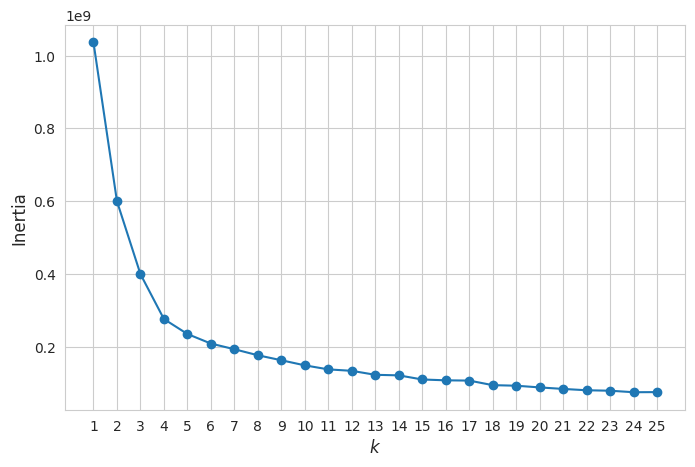

In [ ]:
## a loop to record inertias
inertias = []

for k in range(1,26):
    kmeans = KMeans(k,
                    n_init='auto')
    kmeans.fit(adjfewercols)
    
    ## you can get the inertia from a fit KMeans object
    ## with .inertia_
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))

plt.plot(range(1,26), inertias, '-o')

plt.xlabel("$k$", fontsize=12)
plt.ylabel("Inertia", fontsize=12)

plt.xticks(range(1,26),fontsize=10)
plt.yticks(fontsize=10)

plt.show()



In [ ]:
## Make a KMeans object
kmeans = KMeans(22,
                n_init='auto')

## Fit the kmeans object
kmeans.fit(adjfewercols)

## get the clusters
microclusters = kmeans.predict(adjfewercols)


## Make a KMeans object
kmeans = KMeans(12,
                n_init='auto')

## Fit the kmeans object
kmeans.fit(adjfewercols)

## get the clusters
macroclusters = kmeans.predict(adjfewercols)

clustered_df['adjfewmicro'] = microclusters
clustered_df['adjfewmacro'] = macroclusters
clustered_df.head(20)


<ipython-input-68-a43817e24a08>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_df['adjfewmicro'] = microclusters
<ipython-input-68-a43817e24a08>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_df['adjfewmacro'] = macroclusters


,Shrt_Desc,fewermicro,fewermacro,allmicro,allmacro,fitmicro,fitmacro,adjfewmicro,adjfewmacro
0,"BUTTER,WITH SALT",6,0,7,0,13,1,5,2
1,"BUTTER,WHIPPED,W/ SALT",6,0,7,0,13,1,5,2
2,"BUTTER OIL,ANHYDROUS",6,0,7,0,13,1,5,2
3,"CHEESE,BLUE",0,5,13,4,21,2,18,2
4,"CHEESE,BRICK",0,5,13,4,21,2,16,10
5,"CHEESE,BRIE",3,0,8,0,1,2,18,2
6,"CHEESE,CAMEMBERT",0,5,8,4,1,2,18,2
7,"CHEESE,CARAWAY",0,5,13,4,21,2,18,2
8,"CHEESE,CHEDDAR",0,5,13,4,21,2,16,10
9,"CHEESE,CHESHIRE",0,5,13,4,21,2,18,2


In [ ]:
del sils, microclusters, macroclusters, kmeans, k, inertias

# Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
# using original data set with fewer columns
Z = linkage(fewercols, method = "centroid")
pd.DataFrame(Z, columns=["cluster1","cluster2","distance","size"])

,cluster1,cluster2,distance,size
0,8223.0,8329.0,0.000000,2.0
1,8244.0,8268.0,0.000000,2.0
2,8269.0,8408.0,0.000000,3.0
3,8271.0,8409.0,0.000000,4.0
4,1040.0,1042.0,0.000000,2.0
...,...,...,...,...
8401,5473.0,5475.0,9384.841231,2.0
8402,16794.0,16805.0,9657.342879,7.0
8403,5472.0,16807.0,9767.775613,8398.0
8404,16808.0,16810.0,13447.392146,8400.0


In [ ]:
import matplotlib.pyplot as plt

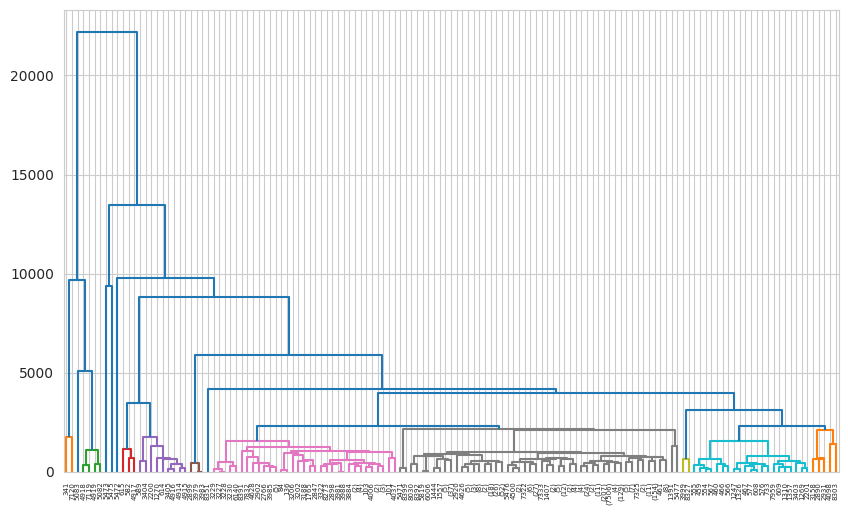

In [ ]:
# possible micro clusters?
plt.figure(figsize=(10,6))
dendrogram(Z,p=15,truncate_mode="level",color_threshold=0.1*max(Z[:,2]))
plt.show()

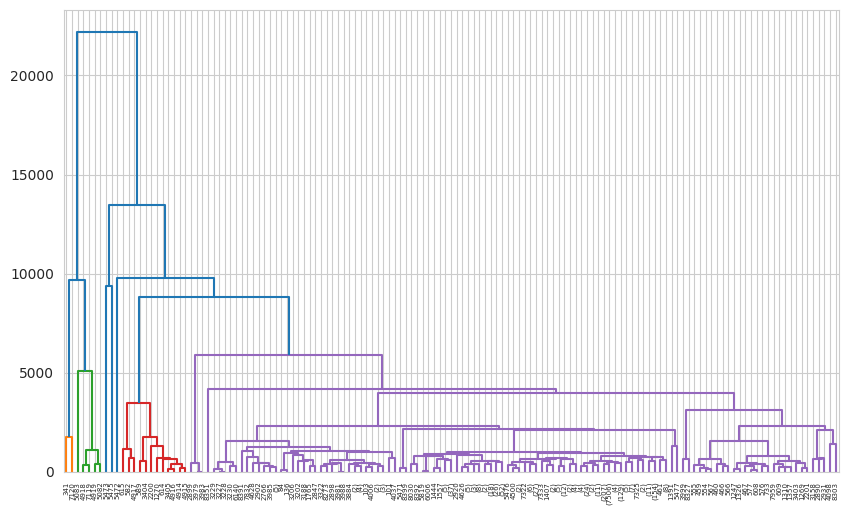

In [ ]:
# possible macro clusters?
plt.figure(figsize=(10,6))
dendrogram(Z,p=15,truncate_mode="level",color_threshold=0.35*max(Z[:,2]))
plt.show()

# one cluster is huge. Maybe we break it up by having a separate "d" for it?

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
# get macro and micro clusters
macroclusters = fcluster(Z,0.35*max(Z[:,2]),criterion="distance")
microclusters = fcluster(Z,0.1*max(Z[:,2]),criterion="distance")

# how many clusters?
print(len(np.unique(macroclusters)))
print(len(np.unique(microclusters)))

# add to cluster_df
clustered_df['Hfewermicro'] = microclusters
clustered_df['Hfewermacro'] = macroclusters
clustered_df.head(20)


7
15


<ipython-input-74-8124e8ba0399>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_df['Hfewermicro'] = microclusters
<ipython-input-74-8124e8ba0399>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_df['Hfewermacro'] = macroclusters


,Shrt_Desc,fewermicro,fewermacro,allmicro,allmacro,fitmicro,fitmacro,adjfewmicro,adjfewmacro,Hfewermicro,Hfewermacro
0,"BUTTER,WITH SALT",6,0,7,0,13,1,5,2,10,6
1,"BUTTER,WHIPPED,W/ SALT",6,0,7,0,13,1,5,2,10,6
2,"BUTTER OIL,ANHYDROUS",6,0,7,0,13,1,5,2,10,6
3,"CHEESE,BLUE",0,5,13,4,21,2,18,2,10,6
4,"CHEESE,BRICK",0,5,13,4,21,2,16,10,10,6
5,"CHEESE,BRIE",3,0,8,0,1,2,18,2,10,6
6,"CHEESE,CAMEMBERT",0,5,8,4,1,2,18,2,10,6
7,"CHEESE,CARAWAY",0,5,13,4,21,2,18,2,10,6
8,"CHEESE,CHEDDAR",0,5,13,4,21,2,16,10,10,6
9,"CHEESE,CHESHIRE",0,5,13,4,21,2,18,2,10,6


In [ ]:
# using original data set with all target nutrient columns
Z = linkage(numdf, method = "centroid")
pd.DataFrame(Z, columns=["cluster1","cluster2","distance","size"])

,cluster1,cluster2,distance,size
0,1040.0,1042.0,0.000000,2.0
1,1041.0,1082.0,0.000000,2.0
2,1045.0,1080.0,0.000000,2.0
3,1048.0,1079.0,0.000000,2.0
4,1049.0,1078.0,0.000000,2.0
...,...,...,...,...
8401,16789.0,16806.0,9659.877501,7.0
8402,5473.0,5475.0,10333.064453,2.0
8403,5472.0,16807.0,12193.059373,8398.0
8404,16809.0,16810.0,13610.887311,8400.0


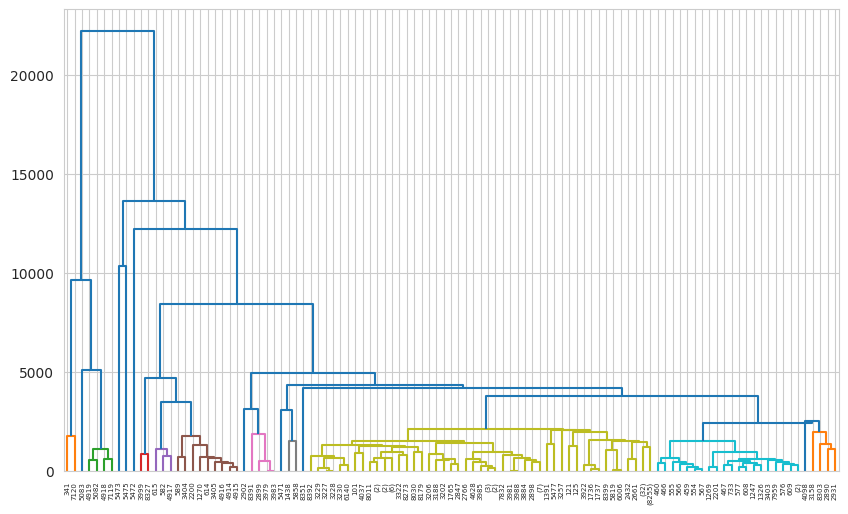

In [ ]:
# possible micro clusters?
plt.figure(figsize=(10,6))
dendrogram(Z,p=15,truncate_mode="level",color_threshold=0.1*max(Z[:,2]))
plt.show()

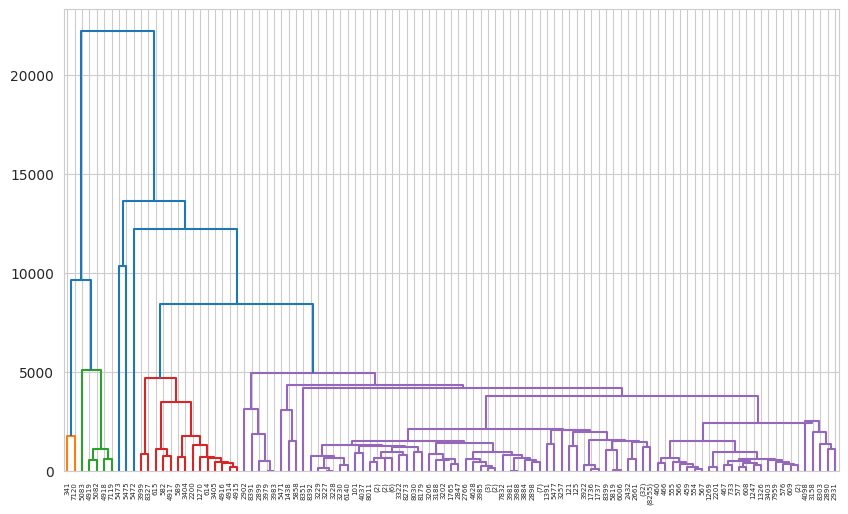

In [ ]:
# possible macro clusters?
plt.figure(figsize=(10,6))
dendrogram(Z,p=15,truncate_mode="level",color_threshold=0.35*max(Z[:,2]))
plt.show()

# one cluster is huge. Maybe we break it up by having a separate "d" for it?

In [ ]:
# get macro and micro clusters
macroclusters = fcluster(Z,0.35*max(Z[:,2]),criterion="distance")
microclusters = fcluster(Z,0.1*max(Z[:,2]),criterion="distance")

# how many clusters?
print(len(np.unique(macroclusters)))
print(len(np.unique(microclusters)))

# add to cluster_df
clustered_df['Hallmicro'] = microclusters
clustered_df['Hallmacro'] = macroclusters
clustered_df.head(20)


7
18


<ipython-input-76-e93f3832d268>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_df['Hallmicro'] = microclusters
<ipython-input-76-e93f3832d268>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_df['Hallmacro'] = macroclusters


,Shrt_Desc,fewermicro,fewermacro,allmicro,allmacro,fitmicro,fitmacro,adjfewmicro,adjfewmacro,Hfewermicro,Hfewermacro,Hallmicro,Hallmacro
0,"BUTTER,WITH SALT",6,0,7,0,13,1,5,2,10,6,13,6
1,"BUTTER,WHIPPED,W/ SALT",6,0,7,0,13,1,5,2,10,6,13,6
2,"BUTTER OIL,ANHYDROUS",6,0,7,0,13,1,5,2,10,6,13,6
3,"CHEESE,BLUE",0,5,13,4,21,2,18,2,10,6,13,6
4,"CHEESE,BRICK",0,5,13,4,21,2,16,10,10,6,13,6
5,"CHEESE,BRIE",3,0,8,0,1,2,18,2,10,6,13,6
6,"CHEESE,CAMEMBERT",0,5,8,4,1,2,18,2,10,6,13,6
7,"CHEESE,CARAWAY",0,5,13,4,21,2,18,2,10,6,13,6
8,"CHEESE,CHEDDAR",0,5,13,4,21,2,16,10,10,6,13,6
9,"CHEESE,CHESHIRE",0,5,13,4,21,2,18,2,10,6,13,6


In [ ]:
# using transformed data set
Z = linkage(fit20, method = "centroid")
pd.DataFrame(Z, columns=["cluster1","cluster2","distance","size"])

,cluster1,cluster2,distance,size
0,1040.0,1042.0,0.000000,2.0
1,1041.0,1082.0,0.000000,2.0
2,1045.0,1080.0,0.000000,2.0
3,1048.0,1079.0,0.000000,2.0
4,1049.0,1078.0,0.000000,2.0
...,...,...,...,...
8401,16801.0,16807.0,52.011166,8401.0
8402,16804.0,16808.0,55.377711,8404.0
8403,3257.0,16809.0,67.266129,8405.0
8404,8351.0,16810.0,71.864990,8406.0


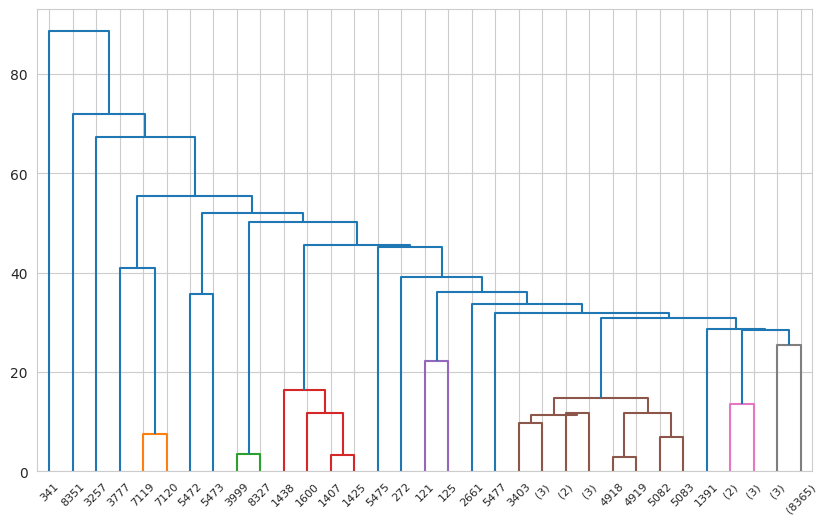

In [ ]:
# possible micro clusters?
plt.figure(figsize=(10,6))
dendrogram(Z,p=15,truncate_mode="level",color_threshold=0.3*max(Z[:,2]))
plt.show()

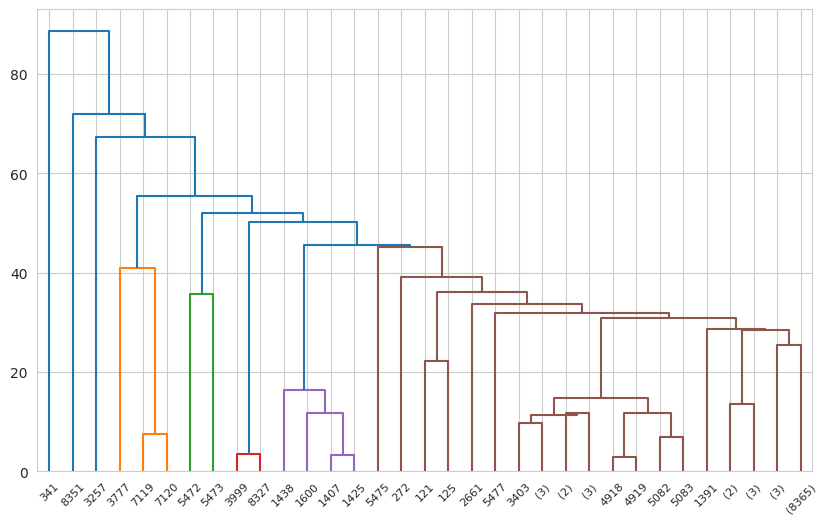

In [ ]:
# possible macro clusters?
plt.figure(figsize=(10,6))
dendrogram(Z,p=15,truncate_mode="level",color_threshold=0.51*max(Z[:,2]))
plt.show()

In [ ]:
# get macro and micro clusters
macroclusters = fcluster(Z,0.51*max(Z[:,2]),criterion="distance")
microclusters = fcluster(Z,0.3*max(Z[:,2]),criterion="distance")

# how many clusters?
print(len(np.unique(macroclusters)))
print(len(np.unique(microclusters)))

# add to cluster_df
clustered_df['Hfitmicro'] = microclusters
clustered_df['Hfitmacro'] = macroclusters
clustered_df.head(20)

# all hierarchical clustering puts all the dairy together, which is good--maybe

8
18


<ipython-input-80-922b0565051c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_df['Hfitmicro'] = microclusters
<ipython-input-80-922b0565051c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustered_df['Hfitmacro'] = macroclusters


,Shrt_Desc,fewermicro,fewermacro,allmicro,allmacro,fitmicro,fitmacro,adjfewmicro,adjfewmacro,Hfewermicro,Hfewermacro,Hallmicro,Hallmacro,Hfitmicro,Hfitmacro
0,"BUTTER,WITH SALT",6,0,7,0,13,1,5,2,10,6,13,6,10,5
1,"BUTTER,WHIPPED,W/ SALT",6,0,7,0,13,1,5,2,10,6,13,6,10,5
2,"BUTTER OIL,ANHYDROUS",6,0,7,0,13,1,5,2,10,6,13,6,10,5
3,"CHEESE,BLUE",0,5,13,4,21,2,18,2,10,6,13,6,10,5
4,"CHEESE,BRICK",0,5,13,4,21,2,16,10,10,6,13,6,10,5
5,"CHEESE,BRIE",3,0,8,0,1,2,18,2,10,6,13,6,10,5
6,"CHEESE,CAMEMBERT",0,5,8,4,1,2,18,2,10,6,13,6,10,5
7,"CHEESE,CARAWAY",0,5,13,4,21,2,18,2,10,6,13,6,10,5
8,"CHEESE,CHEDDAR",0,5,13,4,21,2,16,10,10,6,13,6,10,5
9,"CHEESE,CHESHIRE",0,5,13,4,21,2,18,2,10,6,13,6,10,5


In [ ]:
# using adjusted fewer cols data set
Z = linkage(adjfewercols, method = "centroid")



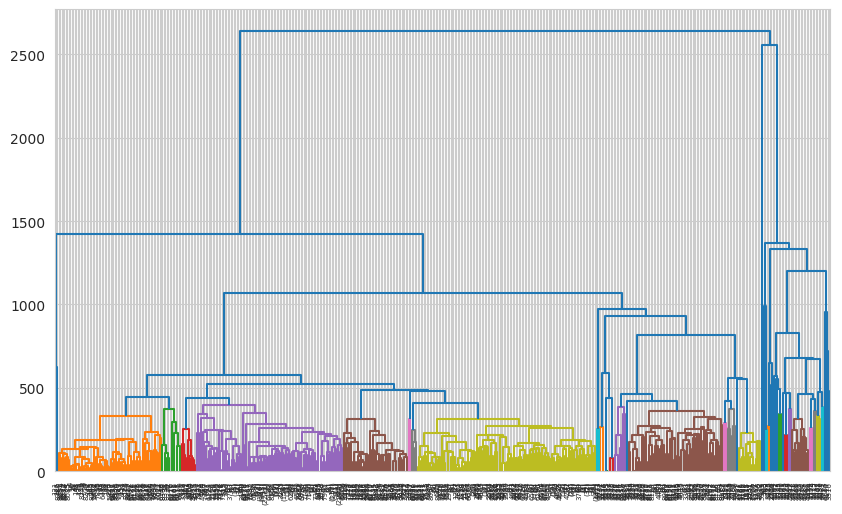

In [ ]:
# possible micro clusters?
plt.figure(figsize=(10,6))
dendrogram(Z,p=15,truncate_mode="level",color_threshold=0.15*max(Z[:,2]))
plt.show()

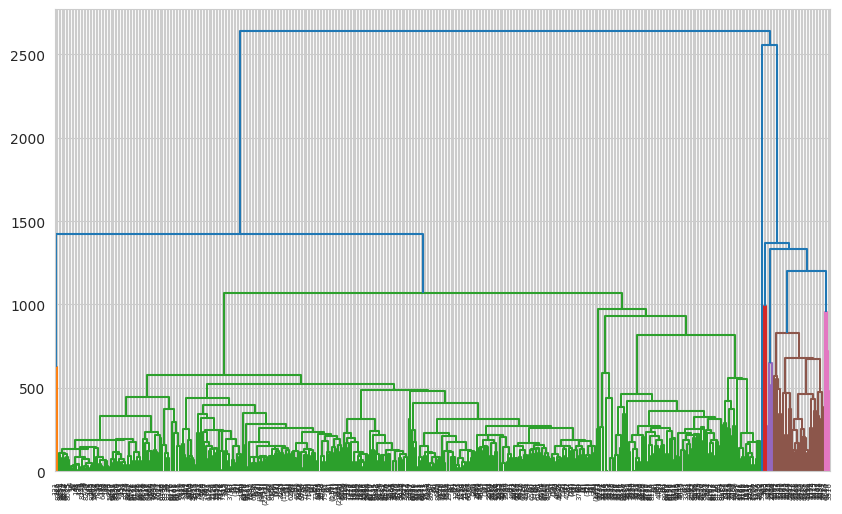

In [ ]:
# possible macro clusters?
plt.figure(figsize=(10,6))
dendrogram(Z,p=15,truncate_mode="level",color_threshold=0.45*max(Z[:,2]))
plt.show()

In [ ]:
# get macro and micro clusters
macroclusters = fcluster(Z,0.45*max(Z[:,2]),criterion="distance")
microclusters = fcluster(Z,0.15*max(Z[:,2]),criterion="distance")

# how many clusters?
print(len(np.unique(macroclusters)))
print(len(np.unique(microclusters)))

# add to cluster_df
clustered_df['Hadjfewmicro'] = microclusters
clustered_df['Hadjfewmacro'] = macroclusters
clustered_df.head(20)

# all hierarchical clustering puts all the dairy together, which is good--maybe

7
43


,Shrt_Desc,fewermicro,fewermacro,allmicro,allmacro,fitmicro,fitmacro,adjfewmicro,adjfewmacro,Hfewermicro,Hfewermacro,Hallmicro,Hallmacro,Hfitmicro,Hfitmacro,Hadjfewmicro,Hadjfewmacro
0,"BUTTER,WITH SALT",6,0,7,0,13,1,5,2,10,6,13,6,10,5,6,2
1,"BUTTER,WHIPPED,W/ SALT",6,0,7,0,13,1,5,2,10,6,13,6,10,5,6,2
2,"BUTTER OIL,ANHYDROUS",6,0,7,0,13,1,5,2,10,6,13,6,10,5,6,2
3,"CHEESE,BLUE",0,5,13,4,21,2,18,2,10,6,13,6,10,5,6,2
4,"CHEESE,BRICK",0,5,13,4,21,2,16,10,10,6,13,6,10,5,3,2
5,"CHEESE,BRIE",3,0,8,0,1,2,18,2,10,6,13,6,10,5,6,2
6,"CHEESE,CAMEMBERT",0,5,8,4,1,2,18,2,10,6,13,6,10,5,6,2
7,"CHEESE,CARAWAY",0,5,13,4,21,2,18,2,10,6,13,6,10,5,6,2
8,"CHEESE,CHEDDAR",0,5,13,4,21,2,16,10,10,6,13,6,10,5,3,2
9,"CHEESE,CHESHIRE",0,5,13,4,21,2,18,2,10,6,13,6,10,5,6,2


# Compare Clustering

In [ ]:
# calculate members per cluster for the different methods

for i in clustered_df.columns[range(1,len(clustered_df.columns))]:
  print(i)
  print(clustered_df[i].value_counts())
  

fewermicro
3     2537
8     2532
12    2066
16     421
6      285
0      172
17     141
10     102
11      88
5       25
4       14
2       11
13       4
1        4
14       2
15       1
7        1
9        1
Name: fewermicro, dtype: int64
fewermacro
0    4203
5    3992
3     166
2      34
1       7
4       5
Name: fewermacro, dtype: int64
allmicro
8     2712
18    2502
3     2258
7      286
12     219
13     120
0      100
15      98
6       56
2       21
5        9
14       6
16       5
1        5
4        4
9        2
10       2
17       1
11       1
Name: allmicro, dtype: int64
allmacro
0    4241
4    3956
2     159
5      28
1      12
3       6
6       5
Name: allmacro, dtype: int64
fitmicro
13    2935
1     1774
23    1397
24     993
8      474
2      189
19     170
21     123
14      82
6       62
0       57
3       47
15      30
4       14
9       14
5       13
11       8
7        7
22       7
20       3
16       3
18       2
12       1
10       1
17       1
Name: fitmicro, dty

Heirarchical clustering did the worst, but all are bad. >3000 items in one microcluster! Need to rethink.

In [ ]:
del Z, microclusters, macroclusters

In [ ]:
del fewercols, numdf, fit20, clustered_df

# Cluster within each Food Group

Using USDA-supplied food groups as macroclusters, we'll create microclusters within them using k-Means and data adjusted for serving size.

In [ ]:
# create column for food group
common = amount_per_common_measure_df
 
common["macro"] = np.floor(common.NDB_No/1000)

common.macro.describe()


count    8407.000000
mean       15.896872
std         9.097913
min         1.000000
25%        10.000000
50%        15.000000
75%        21.000000
max        93.000000
Name: macro, dtype: float64

In [ ]:
np.unique(common.macro)
# unknown food groups: 23, 27, 28, 31-33, 42-44,48, 80, 83, 90, 93

array([ 1.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
       16., 17., 18., 19., 20., 21., 22., 23., 25., 27., 28., 31., 32.,
       33., 35., 36., 42., 43., 44., 48., 80., 83., 90., 93.])

In [ ]:
fgroups = pd.DataFrame({"macro" : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,
                                   18,19,20,21,22,25,35,36],
                        "groupname":["DairyEgg","SpicesHerbs","BabyFood",
                                     "FatsOils","PoultryProducts",
                                     "SoupsSaucesGravies","DeliMeats",
                                     "BreakfastCereal",
                                     "FruitsJuices","PorkProducts",
                                     "VegetableProducts","NutsSeeds",
                                     "BeefProducts","Beverages","Seafood",
                                     "LegumeProducts","LambVealGame",
                                     "BakedGoods","Sweets","GrainsPasta",
                                     "FastFood","MealsEntreesSides",
                                     "Snacks","IndigenousFoods",
                                     "RestaurantFood"]})

common = common.merge(fgroups,how="left",on="macro")

del fgroups

In [ ]:
common.groupname.value_counts()

VegetableProducts     791
BakedGoods            486
LambVealGame          464
Sweets                424
SoupsSaucesGravies    415
PoultryProducts       382
BeefProducts          380
FastFood              361
Beverages             360
FruitsJuices          359
LegumeProducts        357
BreakfastCereal       345
PorkProducts          336
Seafood               259
DairyEgg              250
FatsOils              189
GrainsPasta           180
IndigenousFoods       165
DeliMeats             155
NutsSeeds             137
RestaurantFood        109
MealsEntreesSides      98
Snacks                 60
Name: groupname, dtype: int64

In [ ]:
# 1345 unclassified foods
len(common[common.groupname.isna()])

1345

In [ ]:
# 7000 foods is enough. Drop the unclassified.
common = common[common.groupname.notna()]

In [ ]:
# Do k-Means on each group to find ideal k
silhouette = pd.DataFrame()

for m in np.unique(common.groupname):
  sils = []
  y = common[common.groupname == m]
  y = y[numdf.columns]

  for k in range(2,16):
    kmeans = KMeans(k, n_init='auto',random_state=222).fit(y)
    
    sils.append(silhouette_score(y, kmeans.predict(y)))

  silhouette[m] = sils


In [ ]:
silhouette

,BakedGoods,BeefProducts,Beverages,BreakfastCereal,DairyEgg,DeliMeats,FastFood,FatsOils,FruitsJuices,GrainsPasta,...,MealsEntreesSides,NutsSeeds,PorkProducts,PoultryProducts,RestaurantFood,Seafood,Snacks,SoupsSaucesGravies,Sweets,VegetableProducts
0,0.656075,0.972175,0.783049,0.295790,0.621434,0.908827,0.395094,0.960771,0.685992,0.613886,...,0.812948,0.587874,0.946728,0.939969,0.402307,0.331856,0.662507,0.621879,0.930083,0.661847
1,0.632531,0.926318,0.763331,0.324494,0.489266,0.873520,0.279529,0.860661,0.550486,0.423195,...,0.387028,0.594591,0.542415,0.922315,0.423042,0.360300,0.292434,0.583501,0.829479,0.560844
2,0.627304,0.925665,0.756704,0.337454,0.524325,0.876892,0.275281,0.857805,0.523727,0.456626,...,0.338722,0.576196,0.542017,0.903567,0.363518,0.348763,0.278224,0.545017,0.680765,0.511964
3,0.592343,0.642530,0.760180,0.342388,0.532001,0.882366,0.278384,0.576000,0.393933,0.467270,...,0.345454,0.582536,0.579447,0.903823,0.388832,0.372240,0.302368,0.526792,0.678596,0.525756
4,0.393828,0.432161,0.671157,0.348916,0.406328,0.500546,0.267820,0.611439,0.333453,0.510129,...,0.360109,0.524357,0.443565,0.835639,0.390886,0.320781,0.378057,0.507010,0.489566,0.382128
5,0.380956,0.414589,0.673936,0.338863,0.408783,0.493962,0.274345,0.627036,0.351996,0.506816,...,0.352977,0.524702,0.439381,0.503481,0.316597,0.281636,0.371165,0.511143,0.492461,0.398621
6,0.562268,0.391369,0.692408,0.319636,0.427088,0.448396,0.253078,0.629340,0.358584,0.482757,...,0.335916,0.496438,0.387563,0.483391,0.358108,0.277267,0.417850,0.510984,0.471794,0.387492
7,0.344570,0.399274,0.688384,0.322644,0.398456,0.443777,0.263887,0.546348,0.368651,0.469557,...,0.327723,0.520399,0.300283,0.478250,0.348565,0.266261,0.434790,0.430570,0.463050,0.388369
8,0.346499,0.445652,0.689457,0.314211,0.396164,0.444297,0.249256,0.550747,0.364774,0.411004,...,0.320871,0.531458,0.308093,0.480519,0.347789,0.232937,0.431179,0.443549,0.380870,0.384878
9,0.268855,0.436575,0.685539,0.303717,0.383915,0.438359,0.264555,0.399537,0.356115,0.418039,...,0.347516,0.530999,0.325275,0.500814,0.356309,0.228057,0.403809,0.448314,0.390399,0.344630


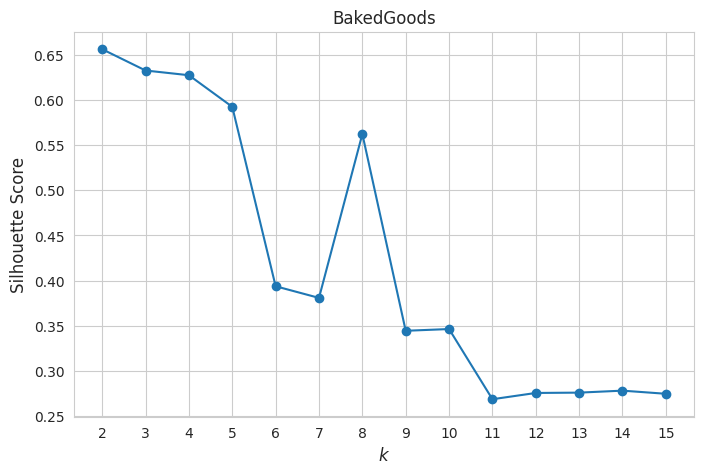

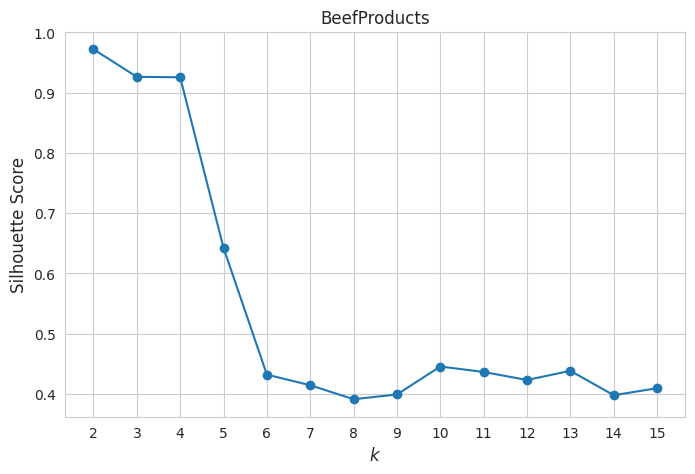

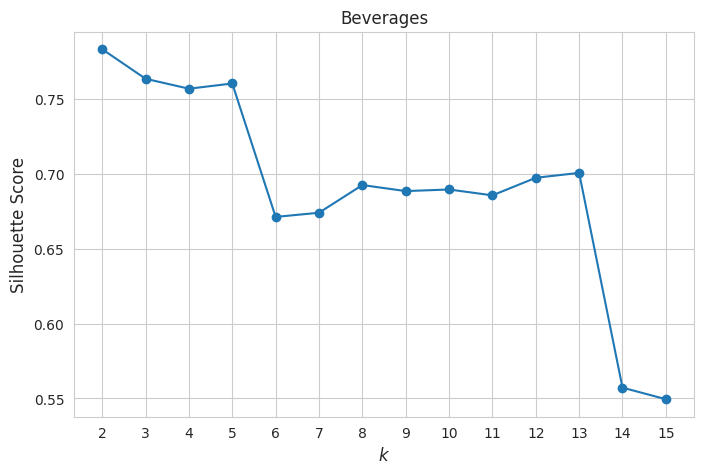

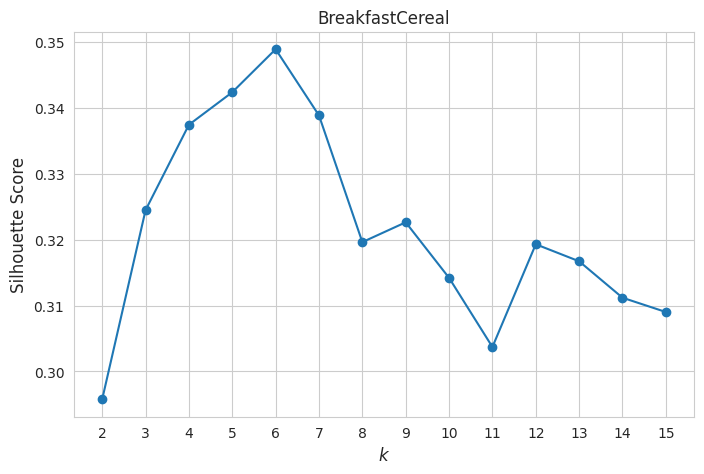

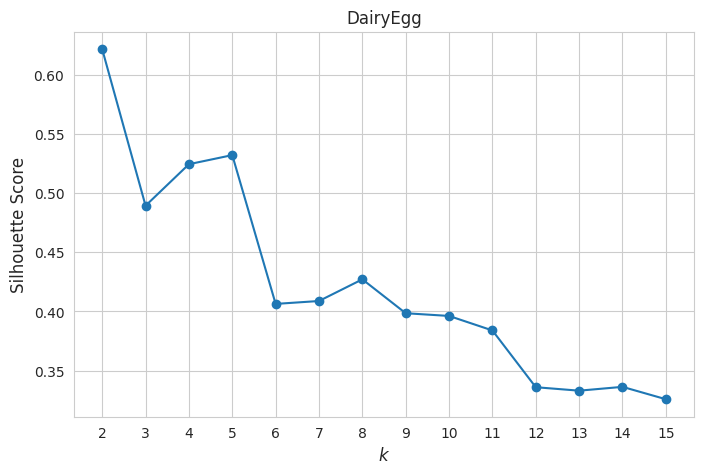

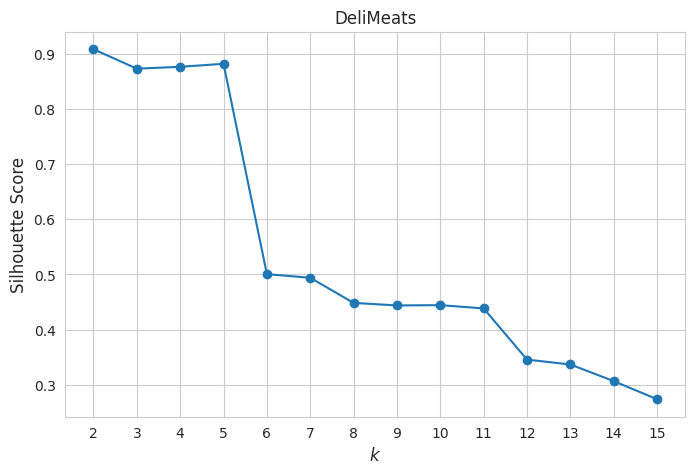

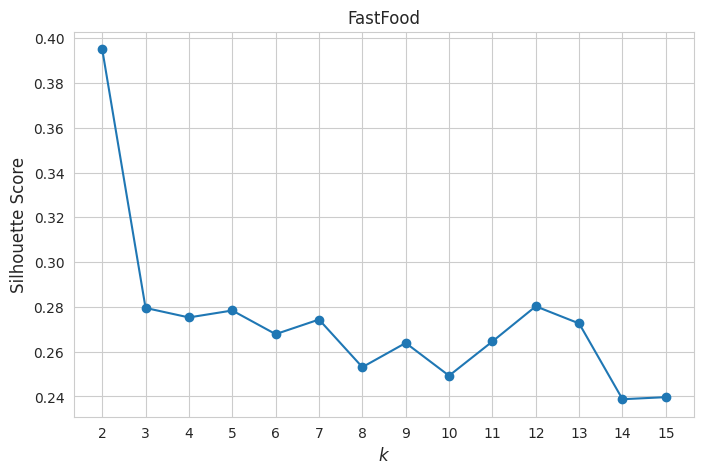

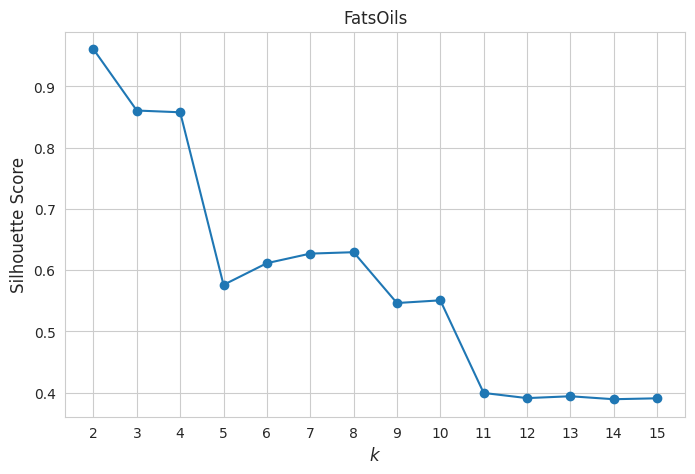

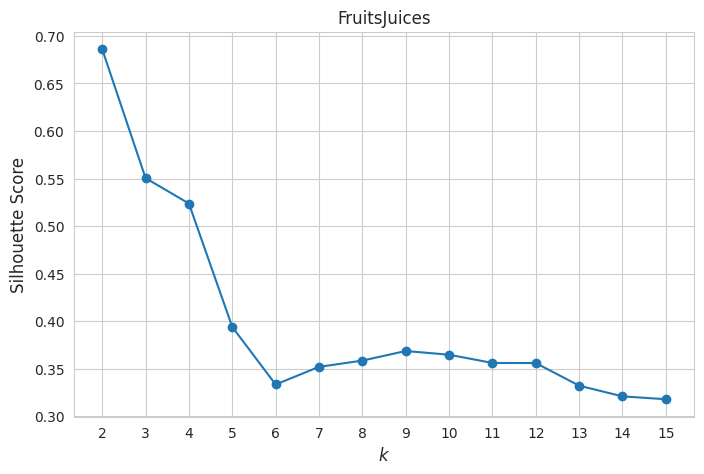

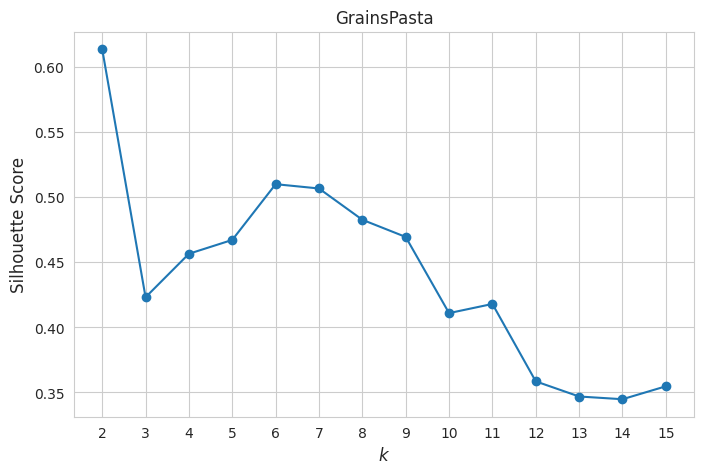

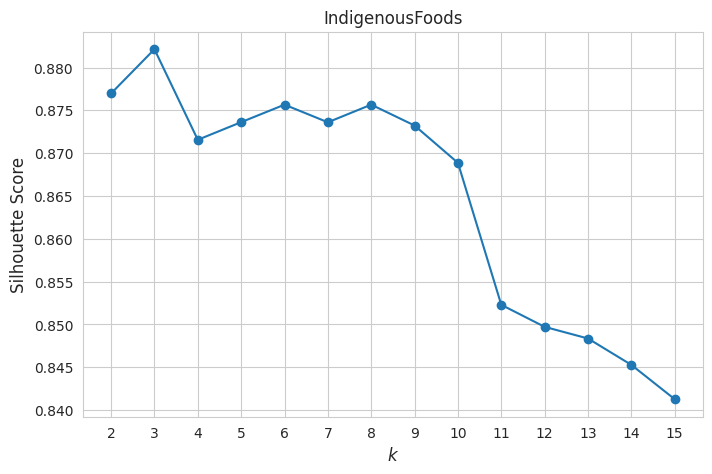

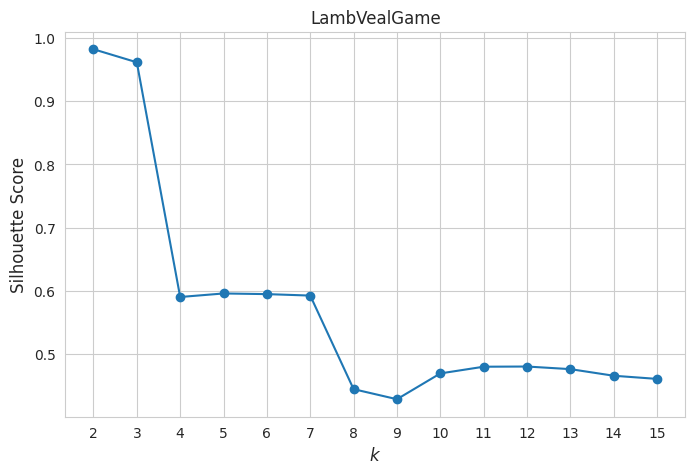

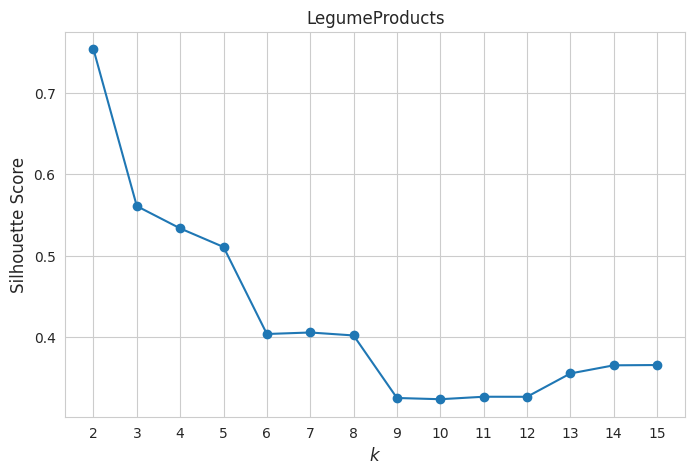

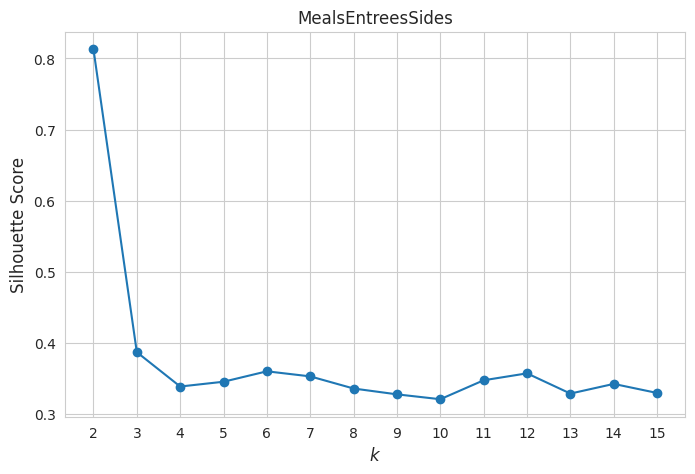

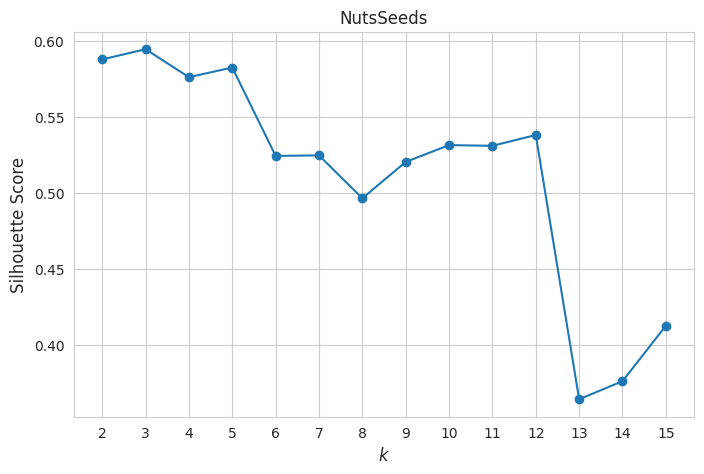

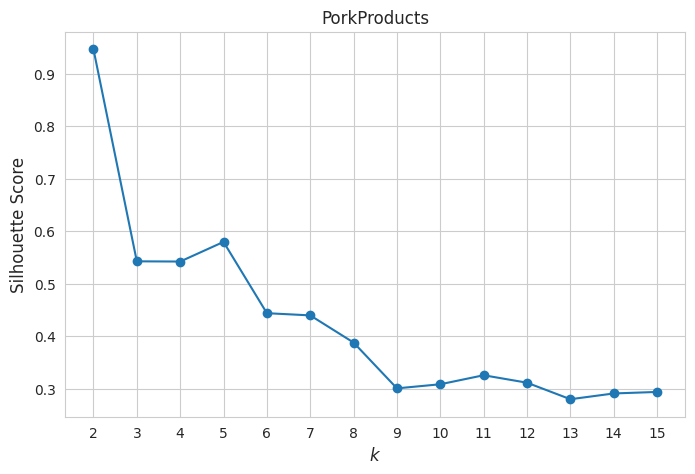

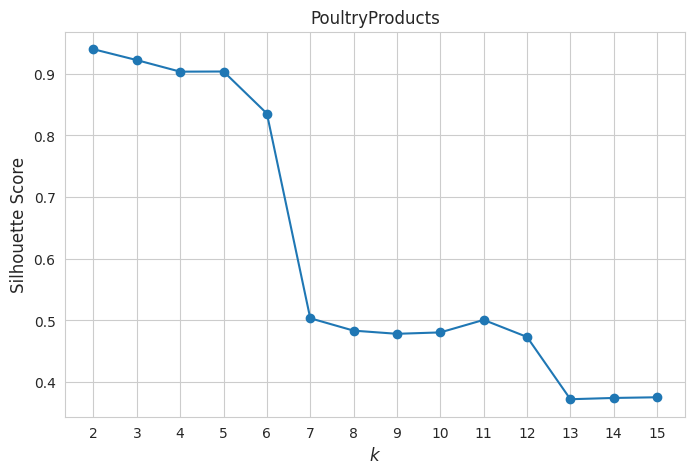

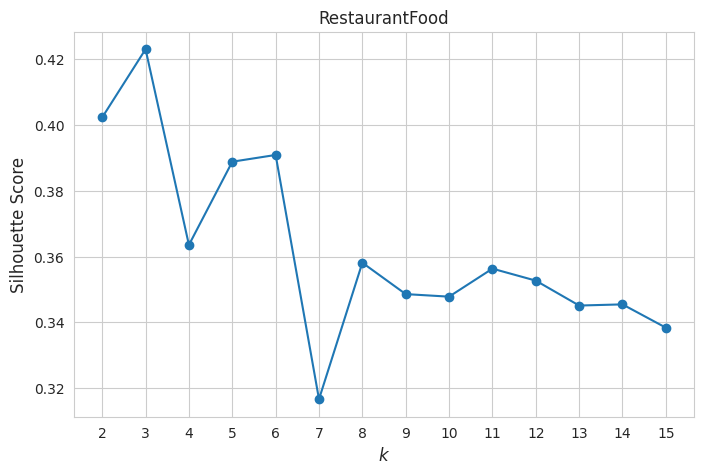

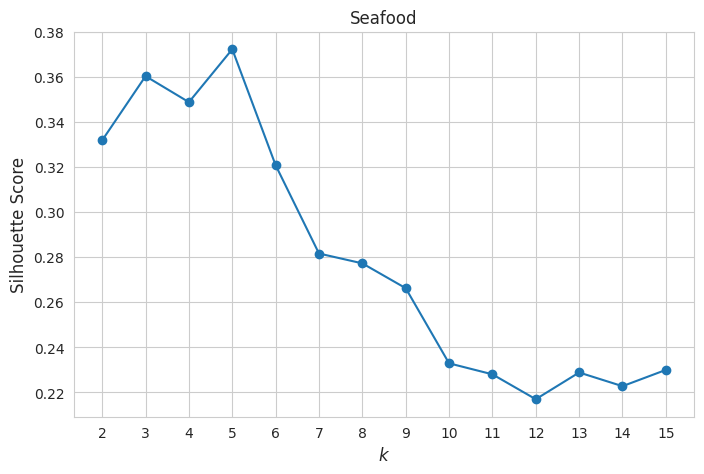

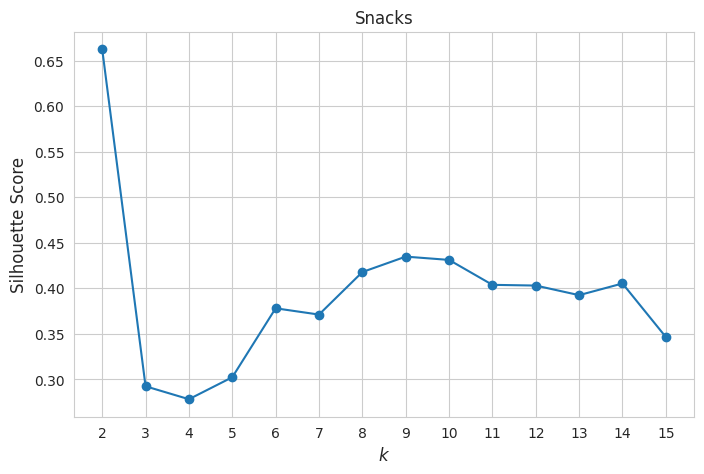

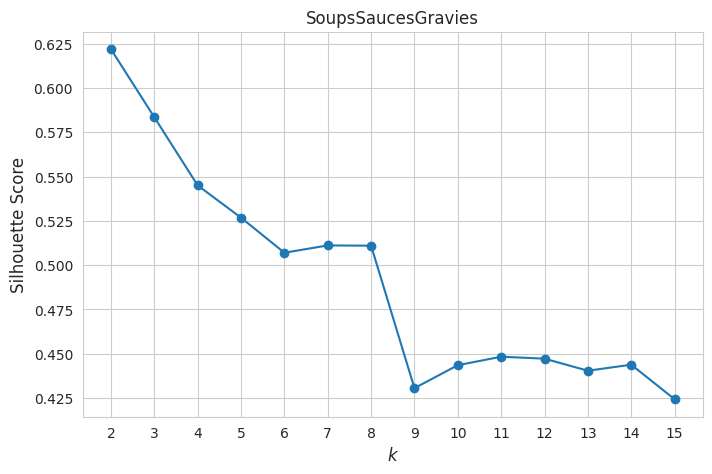

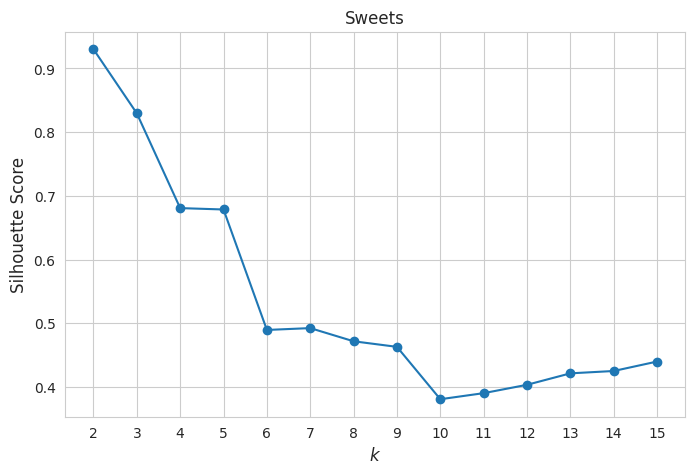

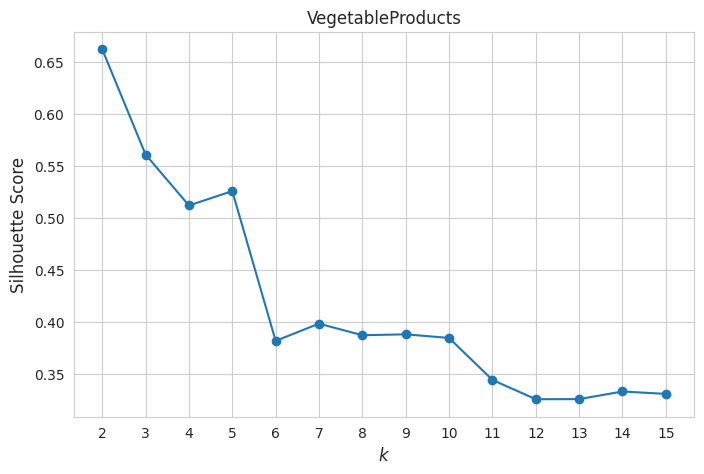

In [ ]:
for m in np.unique(common.groupname):
  plt.figure(figsize=(8,5))
  plt.plot(range(2,16), silhouette[m], '-o')
  plt.xlabel("$k$", fontsize=12)
  plt.ylabel("Silhouette Score", fontsize=12)
  plt.xticks(range(2,16),fontsize=10)
  plt.yticks(fontsize=10)
  plt.title(m)
  plt.show()

In [ ]:
idealk = pd.DataFrame({"groupname":["DairyEgg",
                                     "FatsOils","PoultryProducts",
                                     "SoupsSaucesGravies","DeliMeats",
                                     "BreakfastCereal",
                                     "FruitsJuices","PorkProducts",
                                     "VegetableProducts","NutsSeeds",
                                     "BeefProducts","Beverages","Seafood",
                                     "LegumeProducts","LambVealGame",
                                     "BakedGoods","Sweets","GrainsPasta",
                                     "FastFood","MealsEntreesSides",
                                     "Snacks","IndigenousFoods",
                                     "RestaurantFood"],
                       "k":[12,11,7,9,12,2,6,9,6,13,6,14,10,9,8,11,10,12,
                            3,3,3,15,7]})
idealk

,groupname,k
0,DairyEgg,12
1,FatsOils,11
2,PoultryProducts,7
3,SoupsSaucesGravies,9
4,DeliMeats,12
5,BreakfastCereal,2
6,FruitsJuices,6
7,PorkProducts,9
8,VegetableProducts,6
9,NutsSeeds,13


In [ ]:
clustered = pd.DataFrame()

for m in np.unique(common.groupname):
  # subset data
  y = common[common.groupname == m]
  
  ## Make a KMeans object
  kmeans = KMeans(int(idealk.k[idealk['groupname'] == m]),
                  n_init='auto',random_state=222)
  ## Fit the kmeans object
  kmeans.fit(y[numdf.columns])
  ## get the clusters
  microclusters = kmeans.predict(y[numdf.columns])
  microclusters = [m + str(microcluster) for microcluster in microclusters]
  y["micro"] = microclusters
  clustered = pd.concat([clustered,y],axis=0,ignore_index=True)


In [ ]:
clustered.head(10)

,NDB_No,Shrt_Desc,popularity,Protein_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Zinc_(mg),...,Folate_Tot_(mcg),Choline_Tot_ (mg),Vit_B12_(mcg),Vit_A_RAE,Vit_E_(mg),Vit_D_mcg,Vit_K_(mcg),macro,groupname,micro
0,18001,"BAGEL,PLN,TSTD, ENR W/CA PROP(INCLUDE ONION,PO...",148.0,10.45440,216.8100,3.534300,28.7100,98.010,105.930,0.821700,...,104.940,14.454,0.000000,0.0000,7.38540,0.0,0.19800,18.0,BakedGoods,BakedGoods3
1,18002,"BAGELS,PLN,ENR,W/ CA PROP (INCLUDES ONION,POPP...",0.0,2.67360,3.6000,1.080000,5.7600,22.080,27.840,0.312000,...,31.440,3.792,0.000000,0.0000,0.02880,0.0,0.24000,18.0,BakedGoods,BakedGoods8
2,18003,"BAGELS,EGG",0.0,3.00510,3.6855,1.128330,7.0875,23.814,19.278,0.218295,...,24.948,0.000,0.045360,9.3555,0.00000,0.0,0.00000,18.0,BakedGoods,BakedGoods8
3,18005,"BAGELS,CINNAMON-RAISIN",0.0,2.54800,4.9400,0.988000,7.2800,26.000,38.480,0.293800,...,28.860,3.796,0.000000,5.4600,0.08060,0.0,0.18200,18.0,BakedGoods,BakedGoods8
4,18006,"BAGELS,CINNAMON-RAISIN,TSTD",0.0,2.54400,4.8000,0.981600,5.5200,19.920,39.120,0.194400,...,24.480,3.936,0.000000,5.5200,0.08160,0.0,0.19200,18.0,BakedGoods,BakedGoods8
5,18007,"BAGELS,OAT BRAN",0.0,2.78200,3.1200,0.800800,8.0600,28.600,29.900,0.234000,...,25.480,3.978,0.000000,0.2600,0.08580,0.0,0.10400,18.0,BakedGoods,BakedGoods8
6,18009,"BISCUITS,PLN OR BTTRMLK,FRZ,BKD",0.0,1.75770,13.8915,0.935550,4.8195,121.905,63.504,0.136080,...,19.845,5.670,0.039690,0.0000,0.37422,0.0,1.16235,18.0,BakedGoods,BakedGoods10
7,18010,"BISCUITS,PLN OR BTTRMLK,DRY MIX",0.0,9.60000,214.8000,3.324000,30.0000,702.000,195.600,0.720000,...,150.000,13.200,0.468000,2.4000,0.15600,0.0,7.80000,18.0,BakedGoods,BakedGoods6
8,18011,"BISCUITS,PLN OR BTTRMLK,DRY MIX,PREP",0.0,2.06955,52.4475,0.581175,7.0875,133.245,53.298,0.172935,...,14.742,0.000,0.059535,7.3710,0.00000,0.0,0.00000,18.0,BakedGoods,BakedGoods10
9,18012,"BISCUITS,PLN OR BTTRMLK,REFR DOUGH,LOWER FAT",0.0,3.88600,15.0800,1.235400,8.7000,232.000,92.220,0.226200,...,49.300,2.030,0.000000,0.0000,0.03480,0.0,1.10200,18.0,BakedGoods,BakedGoods7


In [ ]:
# identify clusters with fewer than 5 foods
toosmall = clustered.micro.value_counts().index[
    clustered.micro.value_counts() < 5]

y = clustered[clustered.micro.isin(toosmall)]
y.micro.value_counts()

BakedGoods3          4
Beverages10          4
BakedGoods4          4
BakedGoods2          4
FatsOils4            4
                    ..
IndigenousFoods7     1
IndigenousFoods3     1
IndigenousFoods11    1
IndigenousFoods5     1
IndigenousFoods6     1
Name: micro, Length: 70, dtype: int64

In [ ]:
# Group small clusters into miscellaneous cluster
newcluster = pd.DataFrame()
for m in np.unique(y.groupname):
  z = y[y.groupname == m]
  z["micro"] = m + "Misc"
  newcluster = pd.concat([newcluster,z],axis=0,ignore_index=True)

newcluster.micro.value_counts()

IndigenousFoodsMisc      17
BeveragesMisc            16
BakedGoodsMisc           13
DeliMeatsMisc            12
FatsOilsMisc             11
NutsSeedsMisc             9
LambVealGameMisc          8
DairyEggMisc              5
BeefProductsMisc          4
SeafoodMisc               4
SweetsMisc                4
GrainsPastaMisc           3
PoultryProductsMisc       3
MealsEntreesSidesMisc     2
PorkProductsMisc          2
VegetableProductsMisc     2
FruitsJuicesMisc          1
Name: micro, dtype: int64

In [ ]:
clustered = clustered[-clustered.micro.isin(toosmall)]

clustered = pd.concat([clustered,newcluster],axis=0,ignore_index=True)


In [ ]:
clustered.head(15)

,NDB_No,Shrt_Desc,popularity,Protein_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Zinc_(mg),...,Folate_Tot_(mcg),Choline_Tot_ (mg),Vit_B12_(mcg),Vit_A_RAE,Vit_E_(mg),Vit_D_mcg,Vit_K_(mcg),macro,groupname,micro
0,18002,"BAGELS,PLN,ENR,W/ CA PROP (INCLUDES ONION,POPP...",0.0,2.67360,3.6000,1.080000,5.7600,22.0800,27.8400,0.312000,...,31.4400,3.79200,0.000000,0.0000,0.028800,0.0,0.24000,18.0,BakedGoods,BakedGoods8
1,18003,"BAGELS,EGG",0.0,3.00510,3.6855,1.128330,7.0875,23.8140,19.2780,0.218295,...,24.9480,0.00000,0.045360,9.3555,0.000000,0.0,0.00000,18.0,BakedGoods,BakedGoods8
2,18005,"BAGELS,CINNAMON-RAISIN",0.0,2.54800,4.9400,0.988000,7.2800,26.0000,38.4800,0.293800,...,28.8600,3.79600,0.000000,5.4600,0.080600,0.0,0.18200,18.0,BakedGoods,BakedGoods8
3,18006,"BAGELS,CINNAMON-RAISIN,TSTD",0.0,2.54400,4.8000,0.981600,5.5200,19.9200,39.1200,0.194400,...,24.4800,3.93600,0.000000,5.5200,0.081600,0.0,0.19200,18.0,BakedGoods,BakedGoods8
4,18007,"BAGELS,OAT BRAN",0.0,2.78200,3.1200,0.800800,8.0600,28.6000,29.9000,0.234000,...,25.4800,3.97800,0.000000,0.2600,0.085800,0.0,0.10400,18.0,BakedGoods,BakedGoods8
5,18009,"BISCUITS,PLN OR BTTRMLK,FRZ,BKD",0.0,1.75770,13.8915,0.935550,4.8195,121.9050,63.5040,0.136080,...,19.8450,5.67000,0.039690,0.0000,0.374220,0.0,1.16235,18.0,BakedGoods,BakedGoods10
6,18011,"BISCUITS,PLN OR BTTRMLK,DRY MIX,PREP",0.0,2.06955,52.4475,0.581175,7.0875,133.2450,53.2980,0.172935,...,14.7420,0.00000,0.059535,7.3710,0.000000,0.0,0.00000,18.0,BakedGoods,BakedGoods10
7,18012,"BISCUITS,PLN OR BTTRMLK,REFR DOUGH,LOWER FAT",0.0,3.88600,15.0800,1.235400,8.7000,232.0000,92.2200,0.226200,...,49.3000,2.03000,0.000000,0.0000,0.034800,0.0,1.10200,18.0,BakedGoods,BakedGoods7
8,18013,"BISCUITS,PLN OR BTTRMLK,REFR DOUGH,LOWER FAT,BKD",0.0,2.21130,5.3865,0.876015,4.8195,131.8275,52.4475,0.130410,...,23.5305,1.16235,0.000000,0.0000,0.019845,0.0,0.62370,18.0,BakedGoods,BakedGoods10
9,18014,"BISCUIT, PLN OR BUTMLK, REFRI DOUGH, HIGHER FAT",0.0,3.86280,29.5800,1.438400,9.8600,272.6000,93.9600,0.290000,...,33.0600,0.00000,0.029000,1.1600,0.400200,0.0,3.59600,18.0,BakedGoods,BakedGoods7


In [ ]:
del adjfewercols, adjnumdf, amount_per_common_measure_df, common, df
del fewercols, fit20, idealk, k, kmeans, m, microclusters, newcluster
del numdf, silhouette, sils, toosmall, y, z

In [ ]:
# Save clustered data -- done!
clustered.to_csv('/content/drive/MyDrive/Nutrition/clusters.csv')

# Optimize

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
clustered = pd.read_csv('/content/drive/MyDrive/Nutrition/clusters.csv')

In [ ]:
# nested for loops?  
print("There are ",len(np.unique(clustered.micro))," microclusters")

There are  145  microclusters


In [ ]:
# average nutrient profile per cluster
nutrients = clustered[['Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)',
       'Phosphorus_(mg)', 'Potassium_(mg)', 'Zinc_(mg)',
       'Copper_mg)', 'Manganese_(mg)', 'Selenium_(mcg)', 'Vit_C_(mg)',
       'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)',
       'Vit_B6_(mg)', 'Folate_Tot_(mcg)','Choline_Tot_ (mg)',
       'Vit_B12_(mcg)', 'Vit_A_RAE', 'Vit_E_(mg)', 'Vit_D_mcg',
       'Vit_K_(mcg)',"micro"]]

clustermeans = nutrients.groupby(["micro"]).mean()

clustermeans

,Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(mcg),Vit_C_(mg),...,Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(mcg),Choline_Tot_ (mg),Vit_B12_(mcg),Vit_A_RAE,Vit_E_(mg),Vit_D_mcg,Vit_K_(mcg)
micro,,,,,,,,,,,,,,,,,,,,,
BakedGoods0,28.969850,0.983621,9.954064,40.044756,61.817395,0.263185,0.049419,0.180849,4.761589,0.145269,...,1.020403,0.110609,0.034010,23.985316,2.956395,0.019156,4.625259,0.134267,0.002524,1.259511
BakedGoods1,40.383000,2.196741,24.592842,126.225895,201.332658,0.832500,0.091822,0.330457,6.551755,0.088947,...,2.648029,0.306686,0.141296,54.543474,11.925795,0.029965,9.779526,0.850001,0.031842,7.438079
BakedGoods10,40.167848,0.797145,10.668795,97.008977,58.956333,0.260059,0.045875,0.216122,4.710308,0.067477,...,0.945780,0.139304,0.036412,20.907159,5.326849,0.044617,5.510508,0.184663,0.017667,1.515062
BakedGoods5,85.075417,2.124953,6.645750,133.404167,38.816917,0.171020,0.011498,0.062849,2.859133,0.000000,...,2.304628,0.069872,0.304165,22.665083,2.639058,0.778967,133.284417,0.204701,0.007667,2.585683
BakedGoods7,103.032250,2.026001,18.463786,259.915036,111.346679,0.430636,0.037260,0.160855,3.764504,0.179357,...,1.959383,0.111538,0.091701,34.246607,4.239543,0.205193,1.398357,0.083777,0.000000,0.877179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VegetableProducts1,43.981643,1.296692,33.293464,80.200036,410.399000,0.585146,0.154984,0.346444,2.018764,25.411136,...,1.436291,0.470563,0.197095,52.847214,15.976375,0.008789,52.130857,0.400986,0.283146,20.648375
VegetableProducts2,139.921857,1.968894,46.981286,59.608857,460.639571,0.508051,0.200773,0.679827,1.568514,36.736914,...,0.998888,0.365025,0.210407,62.716714,17.502986,0.000000,780.436571,1.810166,0.000000,392.284657
VegetableProducts4,79.693333,2.089867,53.228889,111.051111,818.217778,0.603067,0.276607,0.771389,1.507111,22.960444,...,1.780636,1.237464,0.429471,26.415556,24.642889,0.000000,2107.415556,2.322911,0.000000,24.186222


In [ ]:
targets = pd.DataFrame({"nutrient":['Calcium_(mg)', 'Iron_(mg)',
                                    'Magnesium_(mg)','Phosphorus_(mg)', 
                                    'Potassium_(mg)', 'Zinc_(mg)','Copper_mg)', 
                                    'Manganese_(mg)', 'Selenium_(mcg)', 
                                    'Vit_C_(mg)','Thiamin_(mg)', 
                                    'Riboflavin_(mg)', 'Niacin_(mg)', 
                                    'Panto_Acid_mg)','Vit_B6_(mg)', 
                                    'Folate_Tot_(mcg)','Choline_Tot_ (mg)',
                                    'Vit_B12_(mcg)', 'Vit_A_RAE', 'Vit_E_(mg)', 
                                    'Vit_D_mcg', 'Vit_K_(mcg)'],
                        "daytarget":[1300,18,420,1250,4700,11,0.9,2.3,55,90,1.2,
                                     1.3,16,5,1.7,400,550,2.4,900,15,20,120]})
targets["mealtarget"] = targets.daytarget / 3

targets

,nutrient,daytarget,mealtarget
0,Calcium_(mg),1300.0,433.333333
1,Iron_(mg),18.0,6.000000
2,Magnesium_(mg),420.0,140.000000
3,Phosphorus_(mg),1250.0,416.666667
4,Potassium_(mg),4700.0,1566.666667
5,Zinc_(mg),11.0,3.666667
6,Copper_mg),0.9,0.300000
7,Manganese_(mg),2.3,0.766667
8,Selenium_(mcg),55.0,18.333333
9,Vit_C_(mg),90.0,30.000000


In [ ]:
combos = pd.DataFrame()

# go through each microcluster
for i in range(len(clustermeans.index)):
  m = clustermeans.index[i]
  temp = pd.DataFrame()
  temp["testvals"] = clustermeans[clustermeans.index == m].transpose()
  temp = temp.reset_index(drop=True)
  temp["nutrient"] = targets.nutrient
  temp["mealtarget"] = targets.mealtarget
  # see if microcluster means are greater than or equal to targets
  temp["compare"] = temp.testvals.ge(temp.mealtarget)
  # if not all means are greater than or equal to targets
  if np.sum(temp["compare"]) < len(temp["compare"]):
    # if we are not at the end of the list of microclusters 
    if i+1 <= len(clustermeans.index):
      # go through the other microclusters we haven't gone through yet
      for j in range(i+1,len(clustermeans.index)):
        n = clustermeans.index[j]
        # select the two microclusters in question
        temp2 = clustermeans[clustermeans.index.isin([m,n])]
        # add them together
        row = pd.DataFrame(temp2.sum()).transpose()
        # create colums for the cluster names
        row["combo1"] = m 
        row["combo2"] = n
        # add to the data frame of combos
        combos = pd.concat([combos,row],axis=0,ignore_index=True)
  else: # if the cluster meets the targets
    # create a row in combos with empty string in combo2 column
    row = clustermeans[clustermeans.index == m]
    row["combo1"] = m 
    row["combo2"] = ""
    combos = pd.concat([combos,row],axis=0,ignore_index=True)
  



In [ ]:
combos

,Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(mcg),Vit_C_(mg),...,Vit_B6_(mg),Folate_Tot_(mcg),Choline_Tot_ (mg),Vit_B12_(mcg),Vit_A_RAE,Vit_E_(mg),Vit_D_mcg,Vit_K_(mcg),combo1,combo2
0,69.352850,3.180362,34.546906,166.270650,263.150053,1.095685,0.141241,0.511306,11.313345,0.234217,...,0.175307,78.528789,14.882189,0.049121,14.404786,0.984268,0.034367,8.697589,BakedGoods0,BakedGoods1
1,69.137698,1.780766,20.622859,137.053733,120.773728,0.523244,0.095294,0.396971,9.471898,0.212746,...,0.070422,44.892475,8.283244,0.063773,10.135767,0.318930,0.020191,2.774573,BakedGoods0,BakedGoods10
2,114.045266,3.108575,16.599814,173.448922,100.634311,0.434205,0.060917,0.243698,7.620723,0.145269,...,0.338175,46.650399,5.595453,0.798124,137.909676,0.338968,0.010191,3.845194,BakedGoods0,BakedGoods5
3,132.002100,3.009622,28.417850,299.959791,173.164073,0.693821,0.086679,0.341704,8.526093,0.324626,...,0.125711,58.231923,7.195938,0.224349,6.023617,0.218045,0.002524,2.136689,BakedGoods0,BakedGoods7
4,40.814098,1.606257,14.599228,62.137920,87.983233,0.399301,0.075229,0.270619,7.480041,0.266732,...,0.046689,38.559329,5.636054,0.041398,10.848536,0.244709,0.013787,2.223314,BakedGoods0,BakedGoods8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10435,162.457155,2.524575,60.089059,85.294251,587.048670,0.747059,0.269446,0.830961,2.454543,49.994898,...,0.290398,85.727886,24.469917,0.000280,813.714295,2.012351,0.119526,413.595766,VegetableProducts2,VegetableProducts5
10436,646.741857,9.372294,219.581286,414.928857,4335.159571,2.943451,1.724753,1.480447,28.274514,52.736914,...,1.455847,263.816714,136.128986,0.000000,798.436571,1.845966,0.000000,403.594657,VegetableProducts2,VegetableProductsMisc
10437,102.228631,2.645547,66.336662,136.736505,944.626876,0.842075,0.345279,0.922523,2.393140,36.218429,...,0.509462,49.426728,31.609820,0.000280,2140.693280,2.525096,0.119526,45.497331,VegetableProducts4,VegetableProducts5
10438,586.513333,9.493267,225.828889,466.371111,4692.737778,3.038467,1.800587,1.572009,28.213111,38.960444,...,1.674911,227.515556,143.268889,0.000000,2125.415556,2.358711,0.000000,35.496222,VegetableProducts4,VegetableProductsMisc


In [ ]:
# check to see if any one cluster meets the targets
combos[combos.combo2 == ""]

,Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(mcg),Vit_C_(mg),...,Vit_B6_(mg),Folate_Tot_(mcg),Choline_Tot_ (mg),Vit_B12_(mcg),Vit_A_RAE,Vit_E_(mg),Vit_D_mcg,Vit_K_(mcg),combo1,combo2


In [ ]:
# check for duplicate combos
combos[['combo1','combo2']].value_counts()[combos[['combo1','combo2']].value_counts() > 1]

Series([], dtype: int64)

In [ ]:
# see which combos form balanced meals
balanced = combos.copy()
for nutr in targets.nutrient:
  target = float(targets["mealtarget"][targets.nutrient == nutr])
  balanced = balanced[balanced[nutr] >= target]

# none of the 2-cluster combos form balanced meals
balanced

,Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(mcg),Vit_C_(mg),...,Vit_B6_(mg),Folate_Tot_(mcg),Choline_Tot_ (mg),Vit_B12_(mcg),Vit_A_RAE,Vit_E_(mg),Vit_D_mcg,Vit_K_(mcg),combo1,combo2


In [ ]:
# add another cluster to each combo
for i in range(len(combos.index)):
  m = combos["combo1"][i]
  n = combos["combo2"][i]
  
  for j in range(k,len(clustermeans.index)):
        n = clustermeans.index[j]
        # select the two microclusters in question
        temp2 = clustermeans[clustermeans.index.isin([m,n])]
        # add them together
        row = pd.DataFrame(temp2.sum()).transpose()
        # create colums for the cluster names
        row["combo1"] = m 
        row["combo2"] = n
        # add to the data frame of combos
        combos = pd.concat([combos,row],axis=0,ignore_index=True)

# New Section

In [126]:
combos2 = []

cluster_array = clustermeans.to_numpy()

for i in range(145):
    print(i)
    for j in range(i + 1, 145):
        for k in range(j + 1, 145):
          clustersum = cluster_array[i] + cluster_array[j] + cluster_array[k]

          if np.greater(clustersum, targets["mealtarget"]).all(axis=0):
              combos2.append([i, j, k])
          else:
              for l in range(k + 1, 145):        
                  clustersum = cluster_array[i] + cluster_array[j] + cluster_array[k]+ cluster_array[l]

                  if np.greater(clustersum, targets["mealtarget"]).all(axis=0):
                      combos2.append([i, j, k, l])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144


In [127]:
combos2

[[0, 4, 109, 119],
 [0, 7, 109, 119],
 [0, 12, 109, 119],
 [0, 16, 109, 112],
 [0, 17, 109, 119],
 [0, 18, 109, 112],
 [0, 18, 109, 119],
 [0, 21, 109, 112],
 [0, 21, 109, 119],
 [0, 23, 109, 112],
 [0, 23, 109, 119],
 [0, 24, 109, 119],
 [0, 25, 109, 119],
 [0, 26, 109, 112],
 [0, 26, 109, 119],
 [0, 28, 109, 112],
 [0, 28, 109, 119],
 [0, 30, 109, 112],
 [0, 30, 109, 119],
 [0, 30, 119, 141],
 [0, 37, 109, 119],
 [0, 38, 109, 119],
 [0, 47, 109, 119],
 [0, 57, 109, 119],
 [0, 58, 109, 119],
 [0, 62, 109, 119],
 [0, 65, 109, 119],
 [0, 70, 109, 119],
 [0, 72, 109, 119],
 [0, 73, 109, 119],
 [0, 74, 109, 119],
 [0, 75, 109, 119],
 [0, 76, 109, 119],
 [0, 77, 109, 112],
 [0, 77, 109, 119],
 [0, 80, 109, 119],
 [0, 83, 109, 119],
 [0, 85, 109, 119],
 [0, 86, 109, 119],
 [0, 88, 109, 119],
 [0, 89, 109, 119],
 [0, 104, 109, 119],
 [0, 105, 109, 119],
 [0, 106, 109, 119],
 [0, 108, 109, 119],
 [0, 109, 112, 119],
 [0, 109, 119, 121],
 [0, 109, 119, 125],
 [0, 109, 119, 126],
 [0, 109, 119,

In [132]:
import json



# Open a file in write mode
with open('output.json', 'w') as file:
    # Convert the list to JSON and write it to the file
    json.dump(combos2, file)

In [131]:
for i in range(145):
  sum = 0
  for sublist in combos2:
    if i in sublist:  
      sum+=1
  if sum==0:
    print(i)

Everything is in a combination of 3 clusters if sum !=0

In [109]:
cc = clustered[clustered['Shrt_Desc'].str.contains('Ascidians (Tunughnak) (Alaska Native)', case=False, regex=False)].index

In [115]:
clustered.iloc[cc].micro.values[0]

'IndigenousFoods0'

In [119]:
matching_rows = clustermeans[clustermeans.index == clustered.iloc[cc].micro.values[0]]

In [120]:
matching_rows

,Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(mcg),Vit_C_(mg),...,Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(mcg),Choline_Tot_ (mg),Vit_B12_(mcg),Vit_A_RAE,Vit_E_(mg),Vit_D_mcg,Vit_K_(mcg)
micro,,,,,,,,,,,,,,,,,,,,,
IndigenousFoods0,0.616798,0.006178,0.306372,0.16506,1.317294,0.001831,0.000216,0.004482,0.014254,0.026004,...,0.004116,0.000717,0.00138,0.040241,0.04333,0.0,0.007603,0.000844,0.0,0.056755
